### Assessment 1: Predict diabetes using Perceptron

In [2]:
# Python 3.5 
import sys
assert sys.version_info >= (3, 5)
#imports
import numpy as np
import time
# Pandas 
import pandas as pd
# Scikit-Learn 0.20 
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
# Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score,precision_score, recall_score, f1_score, fbeta_score, make_scorer,roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')


In [3]:
# Access the dataset
diabetes_dataset = pd.read_csv("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes", sep=r'\s+\d+:', header=None)

C:\Users\Menuja Minu\AppData\Local\Temp\ipykernel_16656\1529062318.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  diabetes_dataset = pd.read_csv("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes", sep=r'\s+\d+:', header=None)


In [4]:
# extract feature and label names
feature_names = diabetes_dataset.columns[1:].tolist()
label_name = diabetes_dataset[diabetes_dataset.columns[0]].unique()

# print feature and label names of the dataset
print(f"Feature names: {feature_names}")
print(f"Label name: {label_name}")

Feature names: [1, 2, 3, 4, 5, 6, 7, 8]
Label name: [-1  1]


In [5]:
print(diabetes_dataset.info)

<bound method DataFrame.info of      0     1      2     3     4      5          6      7     8
0   -1   6.0  148.0  72.0  35.0    0.0  33.599998  0.627  50.0
1    1   1.0   85.0  66.0  29.0    0.0  26.600000  0.351  31.0
2   -1   8.0  183.0  64.0   0.0    0.0  23.299999  0.672  32.0
3    1   1.0   89.0  66.0  23.0   94.0  28.100000  0.167  21.0
4   -1   0.0  137.0  40.0  35.0  168.0  43.099998  2.288  33.0
..  ..   ...    ...   ...   ...    ...        ...    ...   ...
763  1  10.0  101.0  76.0  48.0  180.0  32.900002  0.171  63.0
764  1   2.0  122.0  70.0  27.0    0.0  36.799999  0.340  27.0
765  1   5.0  121.0  72.0  23.0  112.0  26.200001  0.245  30.0
766 -1   1.0  126.0  60.0   0.0    0.0  30.100000  0.349  47.0
767  1   1.0   93.0  70.0  31.0    0.0  30.400000  0.315  23.0

[768 rows x 9 columns]>


In [6]:
diabetes_dataset.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.302083,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,0.953903,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,-1.000000,1.000000,99.000000,62.000000,0.000000,0.000000,27.299999,0.243750,24.000000
50%,1.000000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,1.000000,6.000000,140.250000,80.000000,32.000000,127.250000,36.599998,0.626250,41.000000
max,1.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.099998,2.420000,81.000000


In [8]:
# Renaming column names
diabetes_dataset.rename(columns={
    0: 'Outcome',
    1: 'Pregnancies',
    2: 'Glucose',
    3: 'BloodPressure',
    4: 'SkinThickness',
    5: 'Insulin',
    6: 'BMI',
    7: 'DiabetesPedigreeFunction',
    8: 'Age'
}, inplace=True)

# Display the updated DataFrame
print(diabetes_dataset.head())

   Outcome  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0       -1          6.0    148.0           72.0           35.0      0.0   
1        1          1.0     85.0           66.0           29.0      0.0   
2       -1          8.0    183.0           64.0            0.0      0.0   
3        1          1.0     89.0           66.0           23.0     94.0   
4       -1          0.0    137.0           40.0           35.0    168.0   

         BMI  DiabetesPedigreeFunction   Age  
0  33.599998                     0.627  50.0  
1  26.600000                     0.351  31.0  
2  23.299999                     0.672  32.0  
3  28.100000                     0.167  21.0  
4  43.099998                     2.288  33.0  


In [9]:
# print feature and label names of the dataset
feature_names = diabetes_dataset.columns[1:].tolist()
print(f"Feature names: {feature_names}")
print(f"Label name: {label_name}")

Feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Label name: [-1  1]


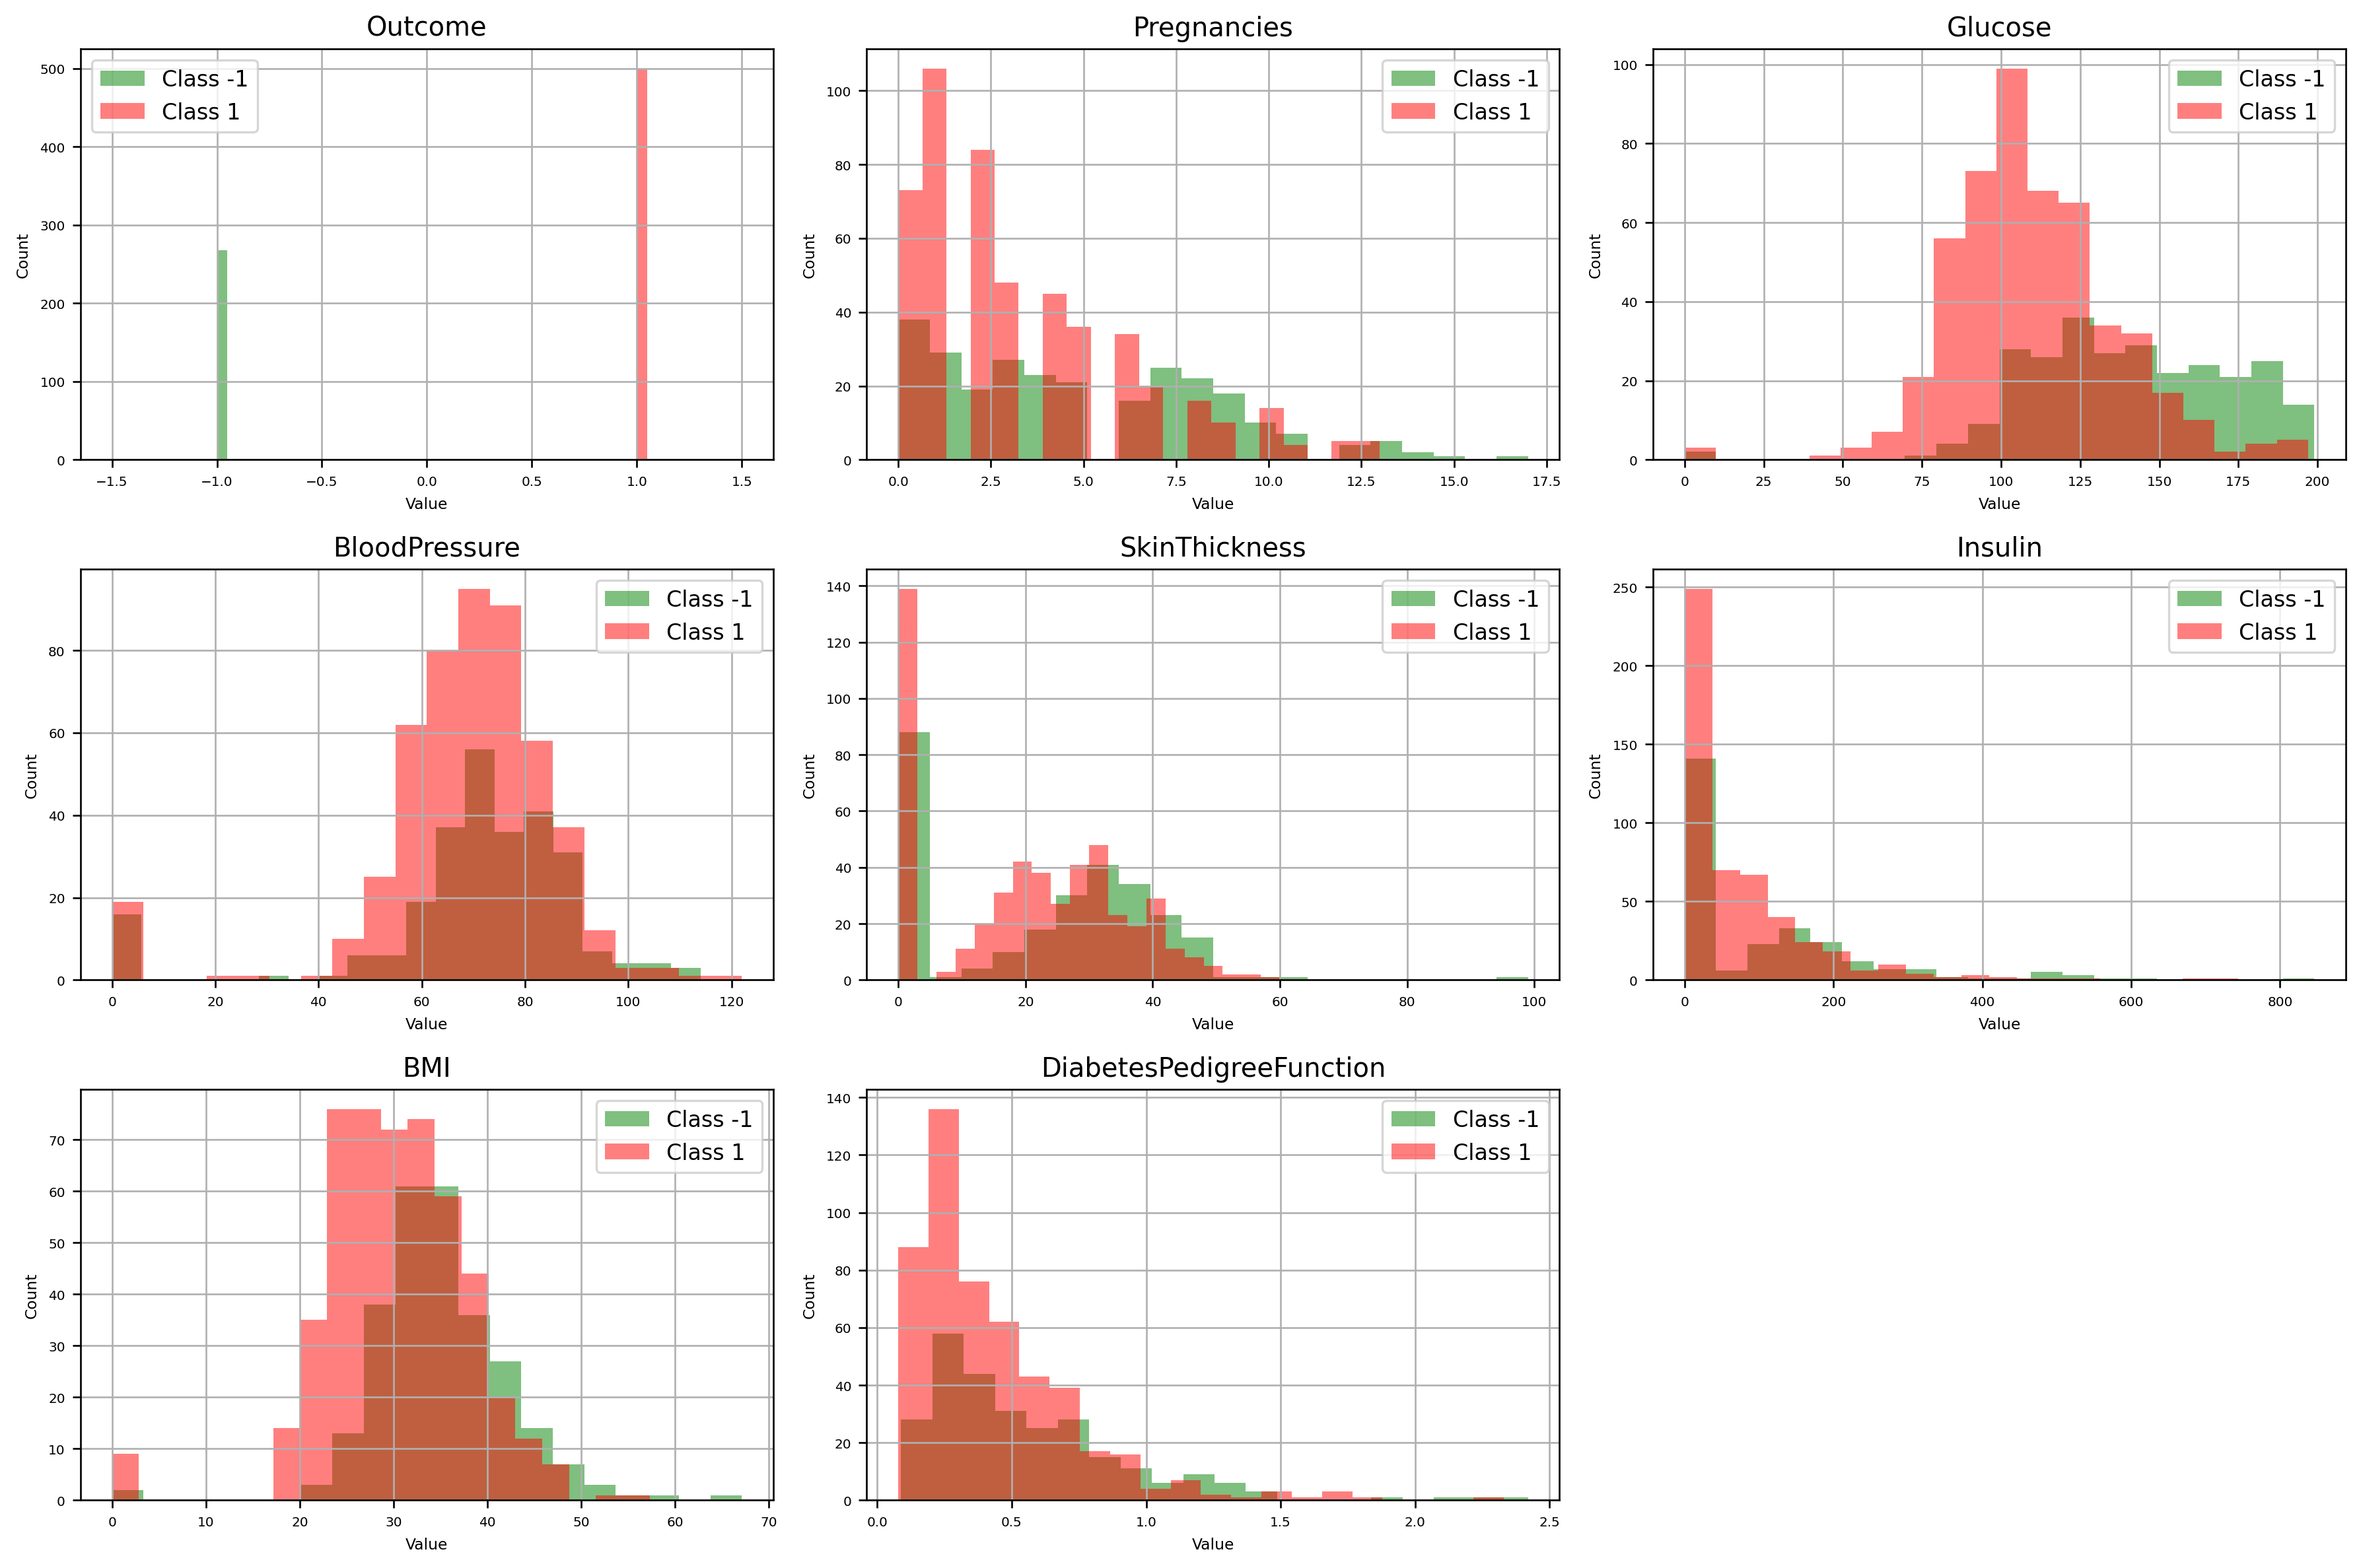

In [10]:
# Set colors for the classes
colors = { -1: 'green', 1: 'red' }

plt.figure(figsize=(15, 10))

for i, feature in enumerate(diabetes_dataset.columns[:-1]):  
    plt.subplot(3, 3, i + 1)
    for class_value in [-1, 1]:
        plt.hist(diabetes_dataset[diabetes_dataset['Outcome'] == class_value][feature], 
                 bins=20, alpha=0.5, color=colors[class_value], label=f'Class {class_value}')
    
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

In [9]:
# Display summary statistics
diabetes_dataset.describe()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.302083,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,0.953903,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,-1.000000,1.000000,99.000000,62.000000,0.000000,0.000000,27.299999,0.243750,24.000000
50%,1.000000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,1.000000,6.000000,140.250000,80.000000,32.000000,127.250000,36.599998,0.626250,41.000000
max,1.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.099998,2.420000,81.000000


In [10]:
# replace missing values
diabetes_dataset[['Glucose', 'BloodPressure','SkinThickness','BMI']] = diabetes_dataset[['Glucose', 'BloodPressure','SkinThickness','BMI']].replace(0, np.nan)
imputer = SimpleImputer(strategy='mean')  

# Fit the imputer on the DataFrame
imputer.fit(diabetes_dataset)

# Transform the DataFrame
diabetes_dataset = pd.DataFrame(imputer.transform(diabetes_dataset), columns=diabetes_dataset.columns)

In [11]:
diabetes_dataset[['Outcome']] = diabetes_dataset[['Outcome']].replace(-1, 0)

AI promp to generated the basis for the following code:
give me pytorch implementation for the most basic linear perceptron in a binary classification problem, measure the Sensitivity, Specificity, Accuracy and loss, and display accuracy and loss in one graph aswell as a confusion matrix

The basic code is altered and modified to specifically meet my requirement


In [96]:
from torch.utils.data import TensorDataset, DataLoader, random_split
df = diabetes_dataset

# Split the features (X) and labels (y)
X = df.drop('Outcome', axis=1).values  # All features
y = df['Outcome'].values  # Labels

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (standard scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert numpy arrays to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=150, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=150, shuffle=False)

# Base

Epoch [10/100], Loss: 0.1826, Accuracy: 0.7410
Epoch [20/100], Loss: 0.2150, Accuracy: 0.7671
Epoch [30/100], Loss: 0.7114, Accuracy: 0.7752
Epoch [40/100], Loss: 0.2998, Accuracy: 0.7704
Epoch [50/100], Loss: 0.3549, Accuracy: 0.7720
Epoch [60/100], Loss: 0.2463, Accuracy: 0.7687
Epoch [70/100], Loss: 0.2741, Accuracy: 0.7687
Epoch [80/100], Loss: 0.5062, Accuracy: 0.7687
Epoch [90/100], Loss: 0.2453, Accuracy: 0.7687
Epoch [100/100], Loss: 0.2539, Accuracy: 0.7704
Sensitivity (Test Set): 0.7172
Specificity (Test Set): 0.6909
Accuracy (Test Set): 0.7078


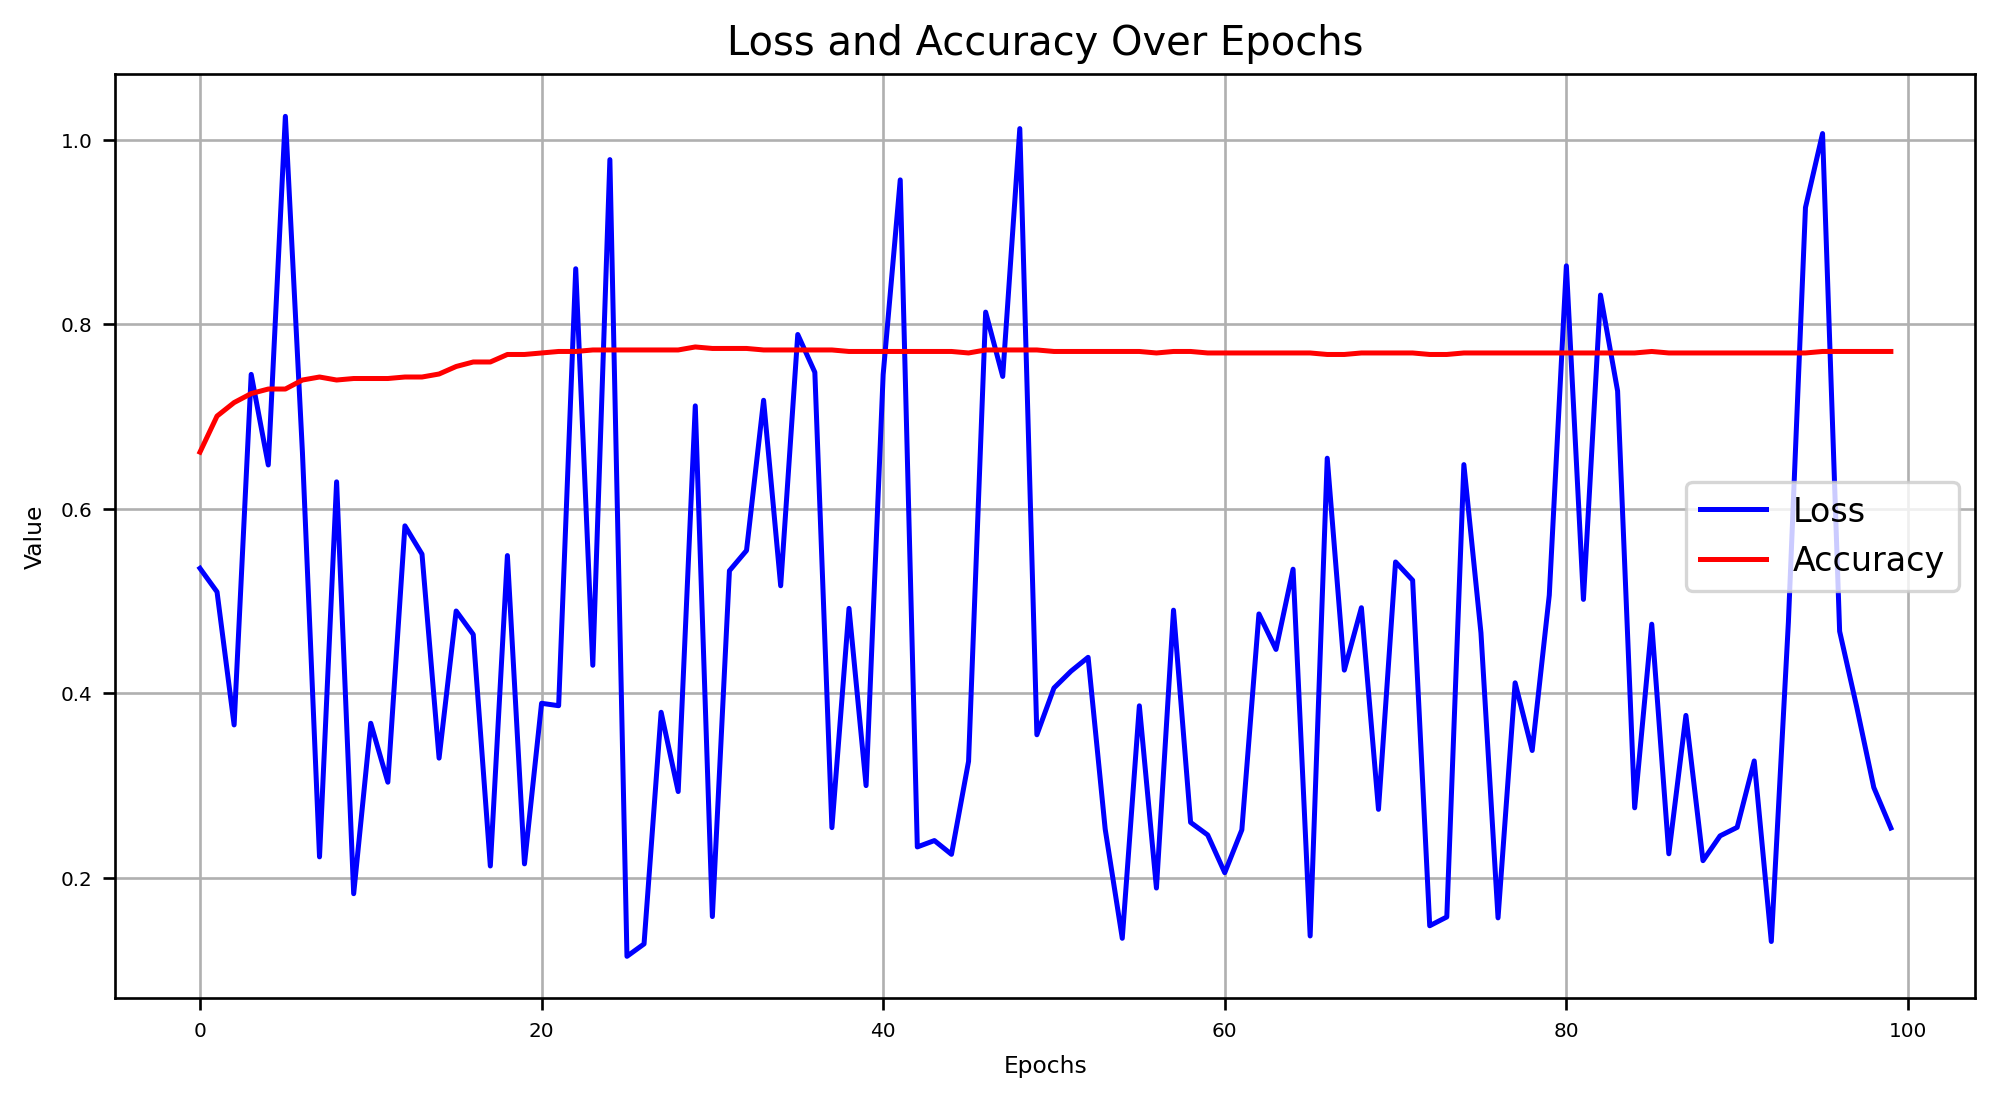

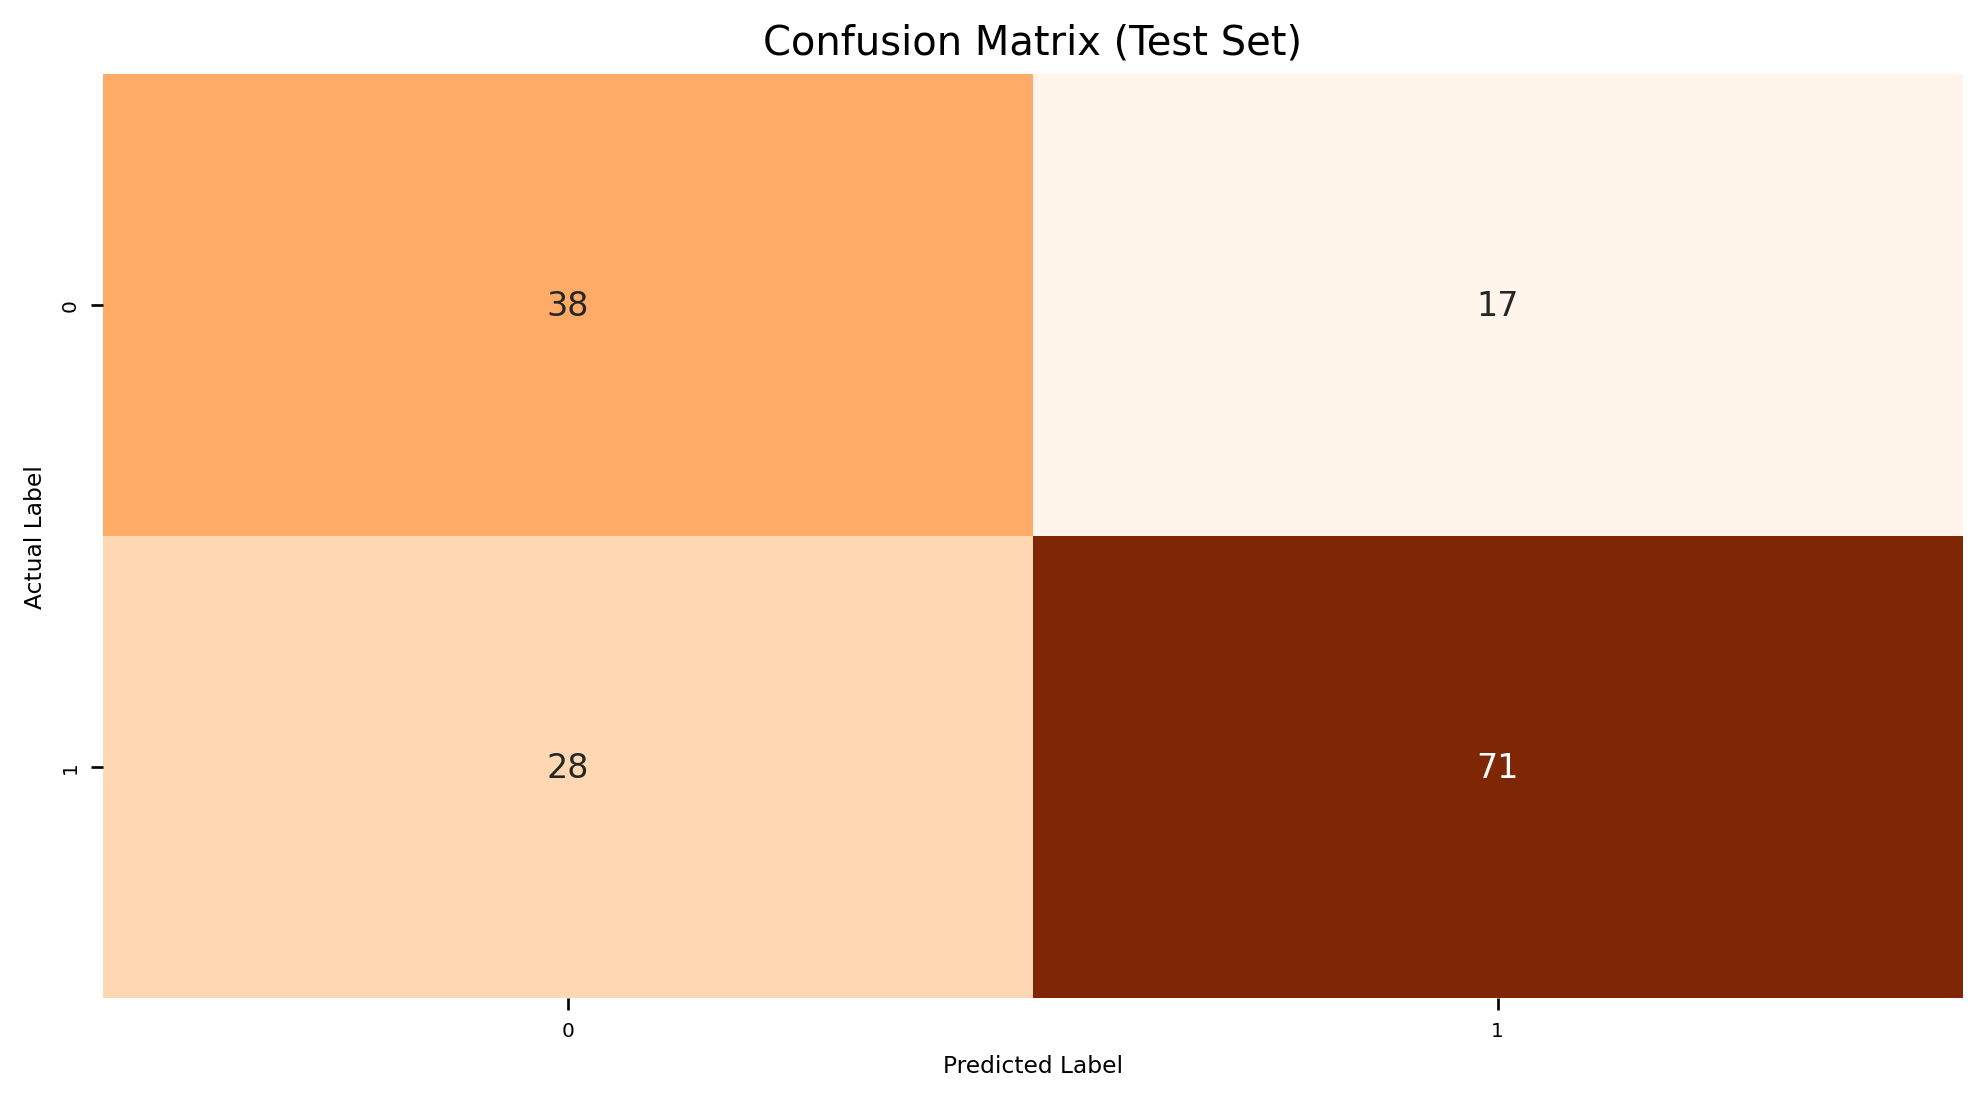

In [36]:
# Model definition: simple linear perceptron
class SimplePerceptron(nn.Module):
    def __init__(self, input_size):
        super(SimplePerceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Hyperparameters
input_size = 8  
learning_rate = 0.01
num_epochs = 100

model = SimplePerceptron(input_size)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()  
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training the model
loss_list = []
accuracy_list = []

for epoch in range(num_epochs):
    model.train()  
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch).squeeze()  
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate accuracy on the training set
    model.eval()  
    with torch.no_grad():
        correct = 0
        total = 0
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch).squeeze()
            predicted = (outputs >= 0.5).float()
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
        accuracy = correct / total
        accuracy_list.append(accuracy)
        loss_list.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

# Evaluation on the test set
model.eval()  
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch).squeeze()
        predicted = (outputs >= 0.5).float()
        all_preds.extend(predicted.tolist())
        all_labels.extend(y_batch.tolist())

# Convert to torch tensors
all_preds = torch.tensor(all_preds)
all_labels = torch.tensor(all_labels)

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
TN, FP, FN, TP = conf_matrix.ravel()

# Sensitivity, Specificity, Accuracy
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f"Sensitivity (Test Set): {sensitivity:.4f}")
print(f"Specificity (Test Set): {specificity:.4f}")
print(f"Accuracy (Test Set): {accuracy:.4f}")

plt.figure(figsize=(10, 5))

plt.plot(loss_list, label='Loss', color='blue')
plt.plot(accuracy_list, label='Accuracy', color='red')

plt.title('Loss and Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# confusion matrix plot 
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# Tuning-1

Epoch [10/500], Loss: 0.7375, Accuracy: 0.4446
Epoch [20/500], Loss: 0.6191, Accuracy: 0.5293
Epoch [30/500], Loss: 0.5272, Accuracy: 0.5945
Epoch [40/500], Loss: 0.6240, Accuracy: 0.6450
Epoch [50/500], Loss: 0.4966, Accuracy: 0.6792
Epoch [60/500], Loss: 0.6308, Accuracy: 0.6971
Epoch [70/500], Loss: 0.5594, Accuracy: 0.7101
Epoch [80/500], Loss: 0.5811, Accuracy: 0.7182
Epoch [90/500], Loss: 0.5988, Accuracy: 0.7199
Epoch [100/500], Loss: 0.5034, Accuracy: 0.7280
Epoch [110/500], Loss: 0.4154, Accuracy: 0.7362
Epoch [120/500], Loss: 0.5517, Accuracy: 0.7410
Epoch [130/500], Loss: 0.4102, Accuracy: 0.7443
Epoch [140/500], Loss: 0.4507, Accuracy: 0.7492
Epoch [150/500], Loss: 0.3913, Accuracy: 0.7524
Epoch [160/500], Loss: 0.3668, Accuracy: 0.7524
Epoch [170/500], Loss: 0.4152, Accuracy: 0.7590
Epoch [180/500], Loss: 0.2822, Accuracy: 0.7590
Epoch [190/500], Loss: 0.6050, Accuracy: 0.7573
Epoch [200/500], Loss: 0.4423, Accuracy: 0.7524
Epoch [210/500], Loss: 0.7421, Accuracy: 0.7573
E

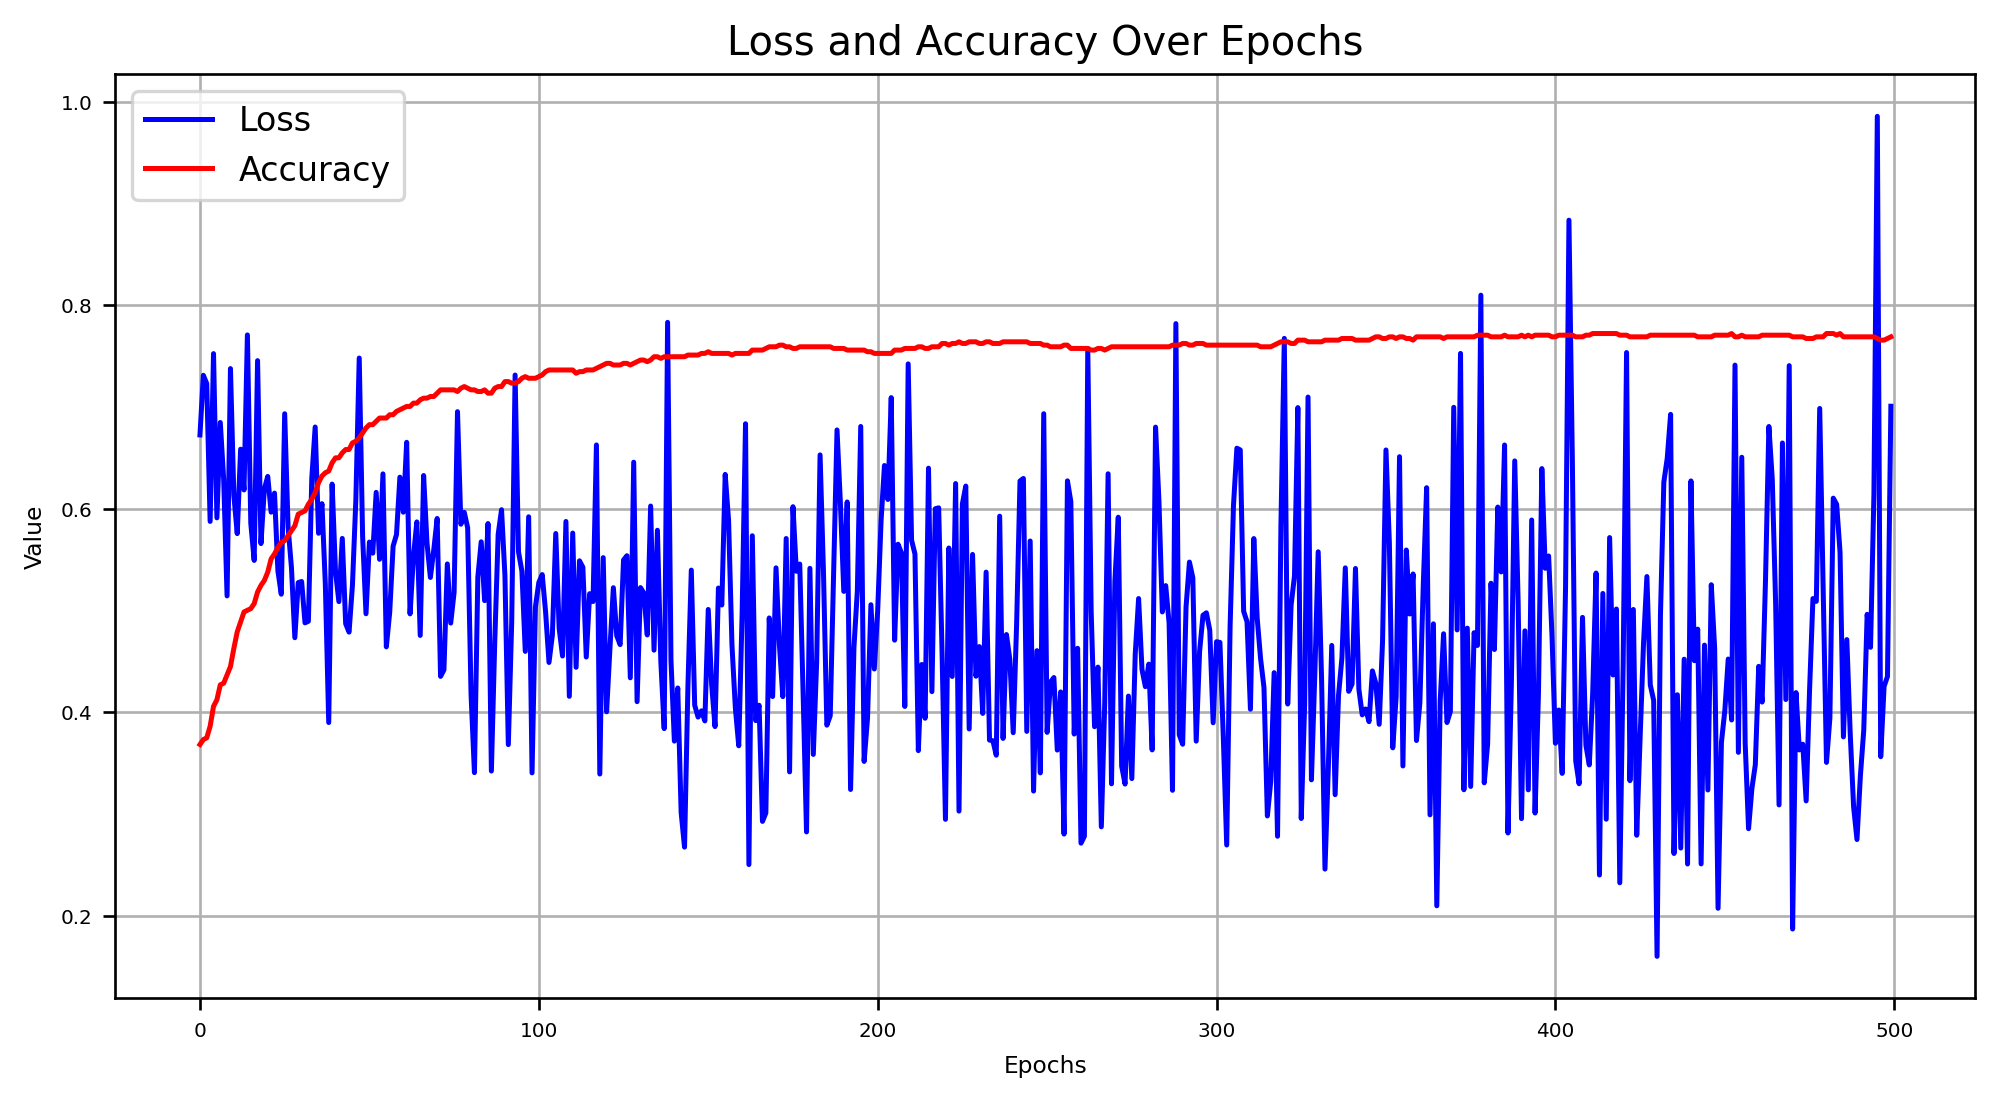

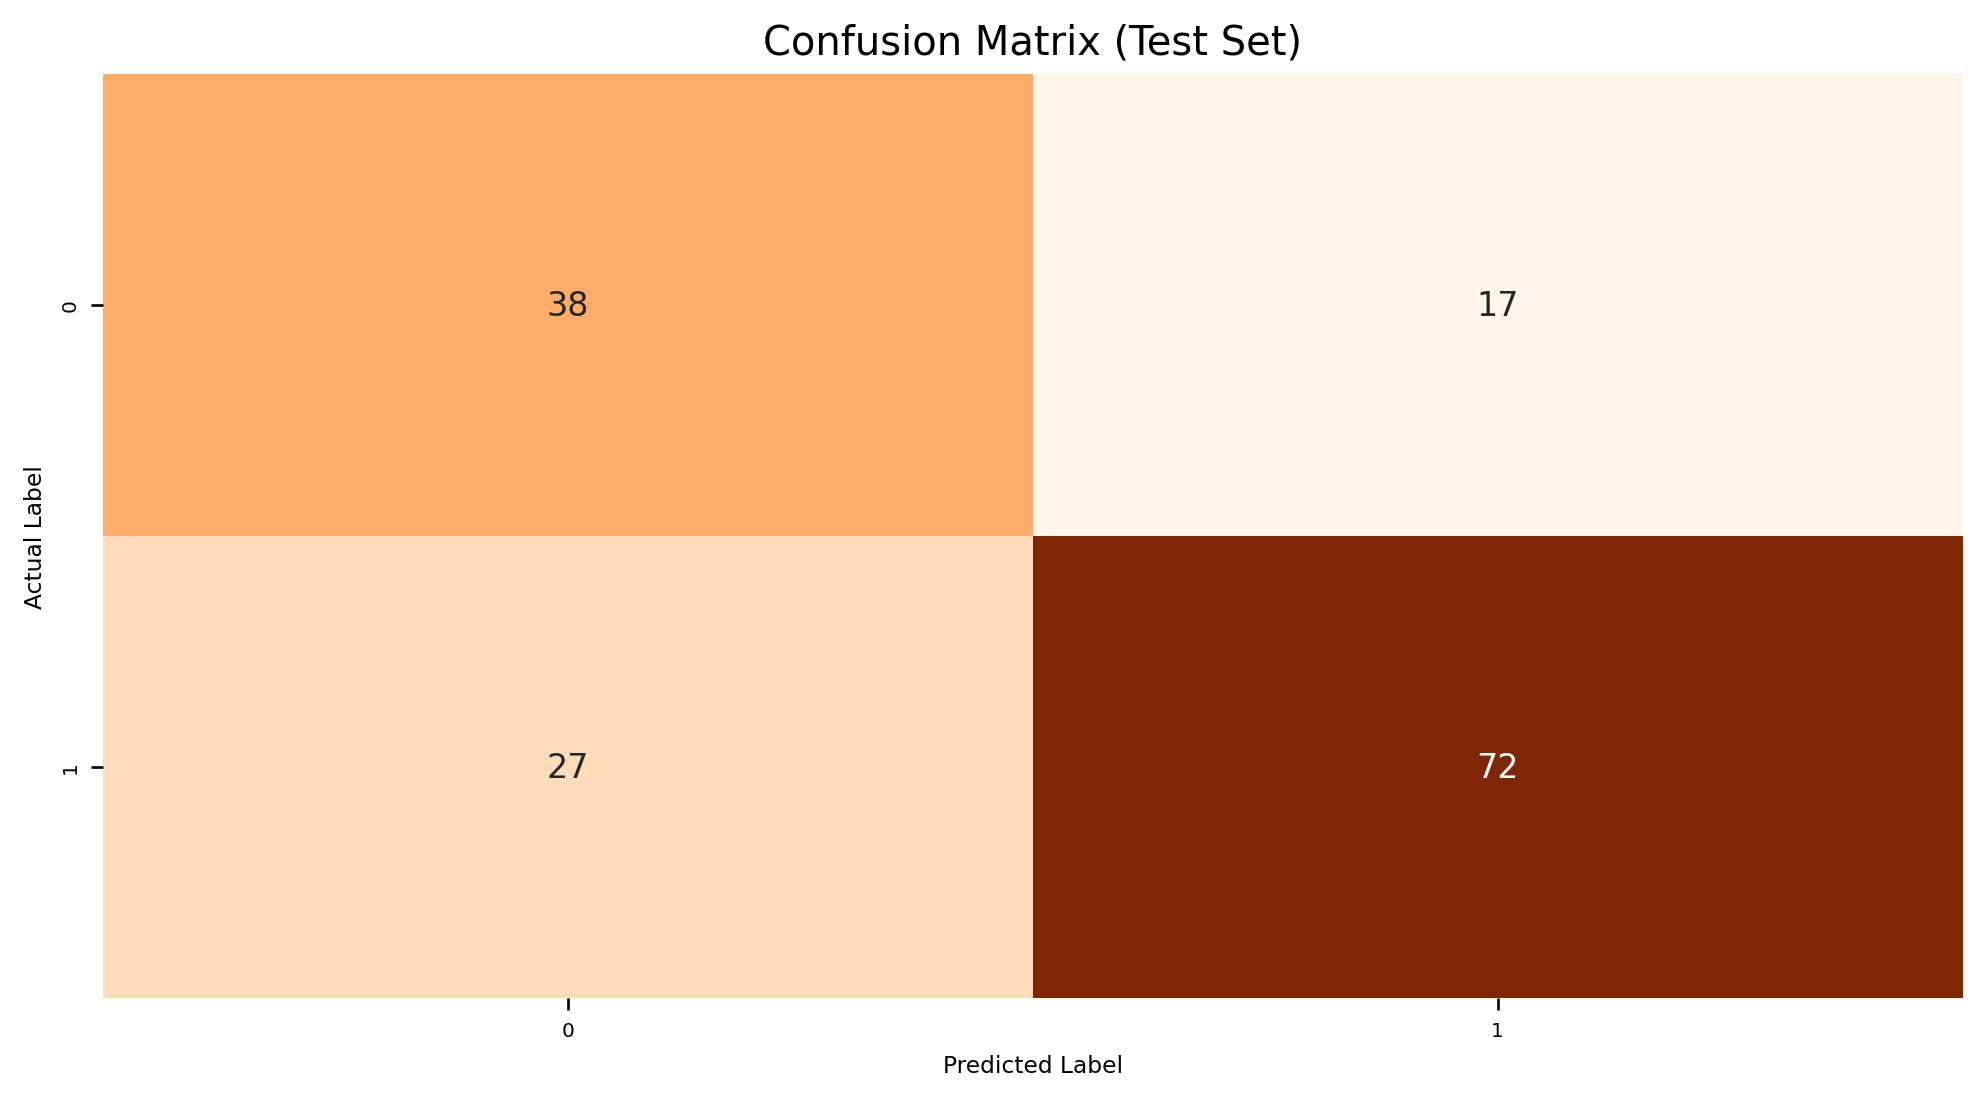

In [89]:
# Model definition: simple linear perceptron
class SimplePerceptron(nn.Module):
    def __init__(self, input_size):
        super(SimplePerceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Hyperparameters
input_size = 8  
learning_rate = 0.001
num_epochs = 500

model = SimplePerceptron(input_size)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss() 
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
loss_list = []
accuracy_list = []

for epoch in range(num_epochs):
    model.train()  
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch).squeeze() 
        loss = criterion(outputs, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate accuracy on the training set
    model.eval()  
    with torch.no_grad():
        correct = 0
        total = 0
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch).squeeze()
            predicted = (outputs >= 0.5).float()
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
        accuracy = correct / total
        accuracy_list.append(accuracy)
        loss_list.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

#Evaluation on the test set
model.eval()  
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch).squeeze()
        predicted = (outputs >= 0.5).float()
        all_preds.extend(predicted.tolist())
        all_labels.extend(y_batch.tolist())

# Convert to torch tensors
all_preds = torch.tensor(all_preds)
all_labels = torch.tensor(all_labels)

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
TN, FP, FN, TP = conf_matrix.ravel()

# Sensitivity, Specificity, Accuracy
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f"Sensitivity (Test Set): {sensitivity:.4f}")
print(f"Specificity (Test Set): {specificity:.4f}")
print(f"Accuracy (Test Set): {accuracy:.4f}")

plt.figure(figsize=(10, 5))

plt.plot(loss_list, label='Loss', color='blue')
plt.plot(accuracy_list, label='Accuracy', color='red')

plt.title('Loss and Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# confusion matrix plot 
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# Tuning 2

Epoch [10/1000], Loss: 0.6411, Accuracy: 0.4349
Epoch [20/1000], Loss: 0.6260, Accuracy: 0.5423
Epoch [30/1000], Loss: 0.6806, Accuracy: 0.6026
Epoch [40/1000], Loss: 0.5545, Accuracy: 0.6384
Epoch [50/1000], Loss: 0.6045, Accuracy: 0.6629
Epoch [60/1000], Loss: 0.5931, Accuracy: 0.6775
Epoch [70/1000], Loss: 0.5538, Accuracy: 0.6971
Epoch [80/1000], Loss: 0.6385, Accuracy: 0.7036
Epoch [90/1000], Loss: 0.5912, Accuracy: 0.7117
Epoch [100/1000], Loss: 0.6743, Accuracy: 0.7150
Epoch [110/1000], Loss: 0.6228, Accuracy: 0.7199
Epoch [120/1000], Loss: 0.5446, Accuracy: 0.7215
Epoch [130/1000], Loss: 0.5774, Accuracy: 0.7215
Epoch [140/1000], Loss: 0.7143, Accuracy: 0.7264
Epoch [150/1000], Loss: 0.4349, Accuracy: 0.7296
Epoch [160/1000], Loss: 0.5589, Accuracy: 0.7345
Epoch [170/1000], Loss: 0.5657, Accuracy: 0.7329
Epoch [180/1000], Loss: 0.6478, Accuracy: 0.7378
Epoch [190/1000], Loss: 0.5936, Accuracy: 0.7410
Epoch [200/1000], Loss: 0.5100, Accuracy: 0.7394
Epoch [210/1000], Loss: 0.555

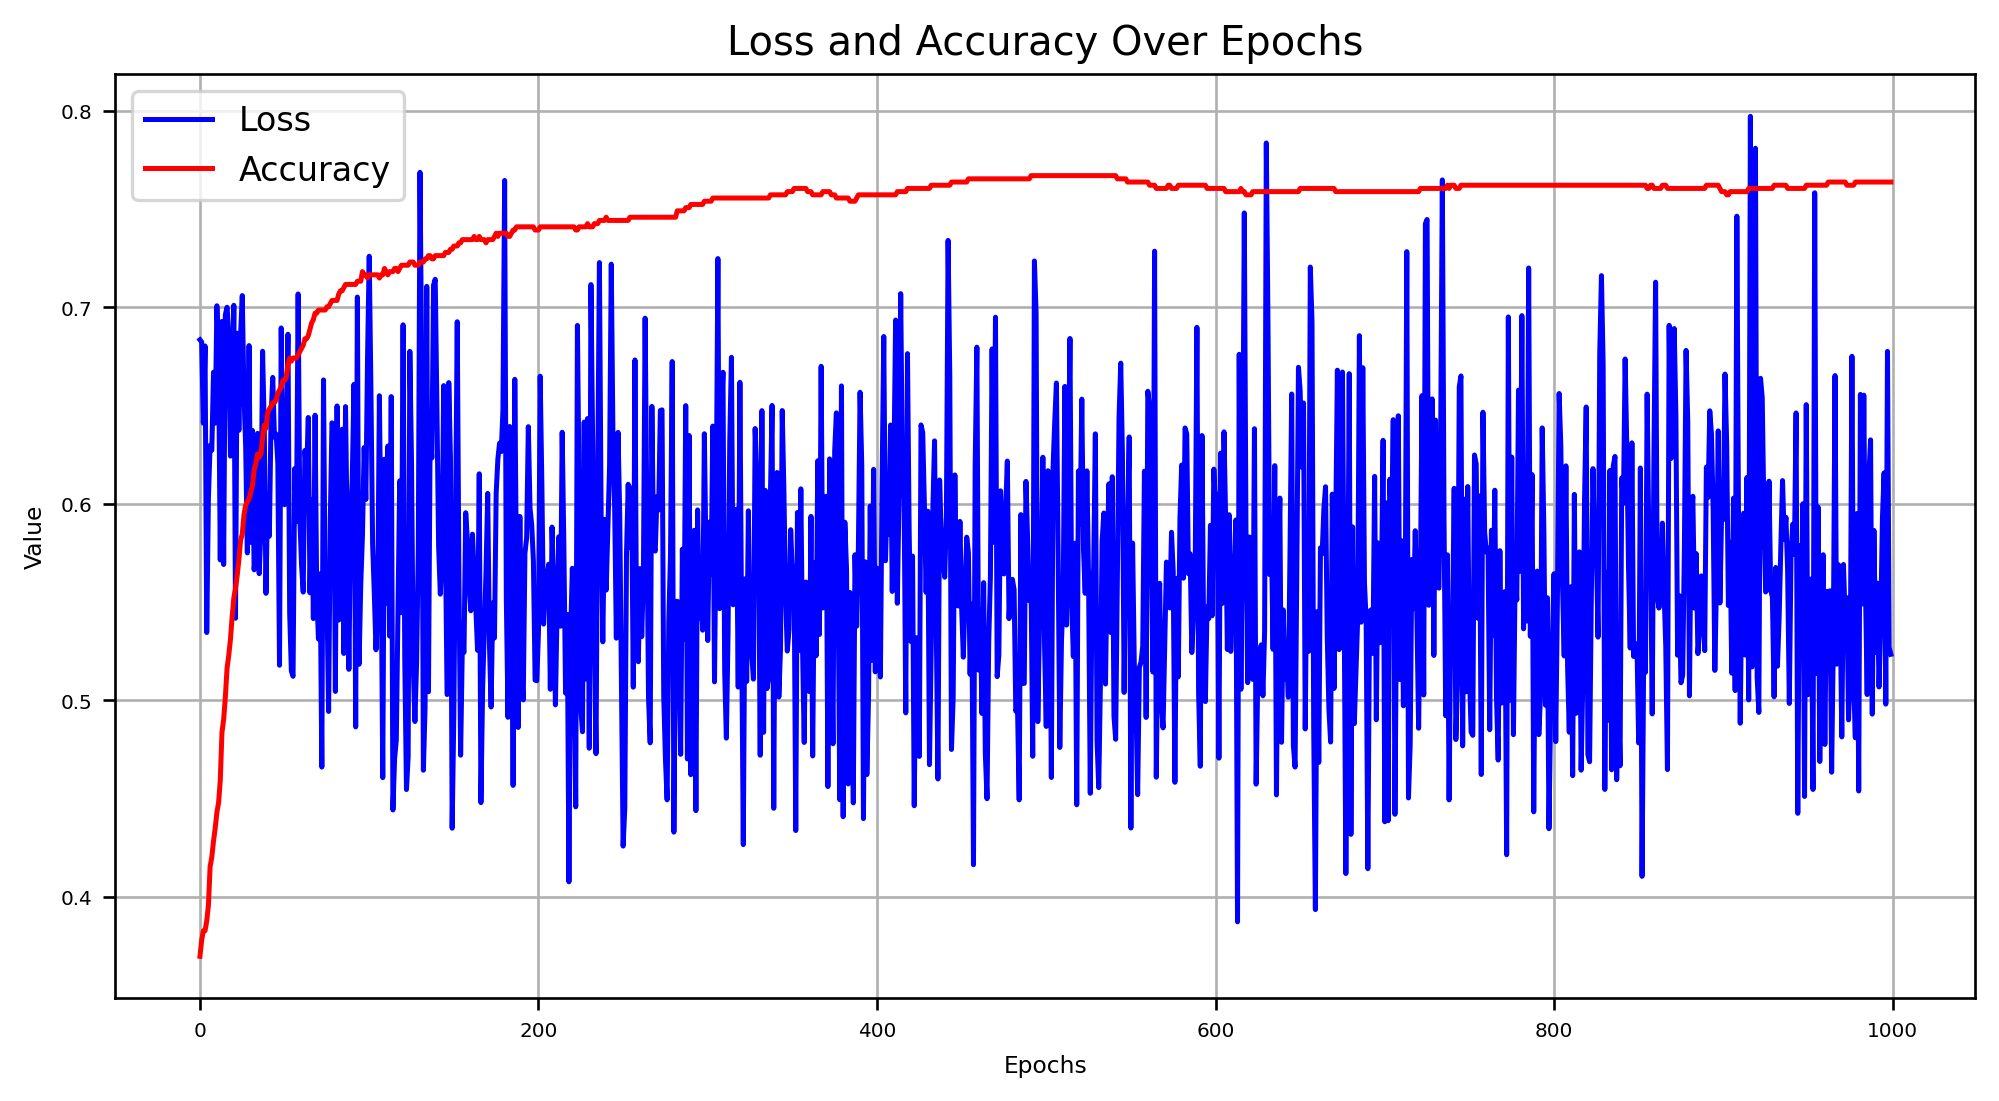

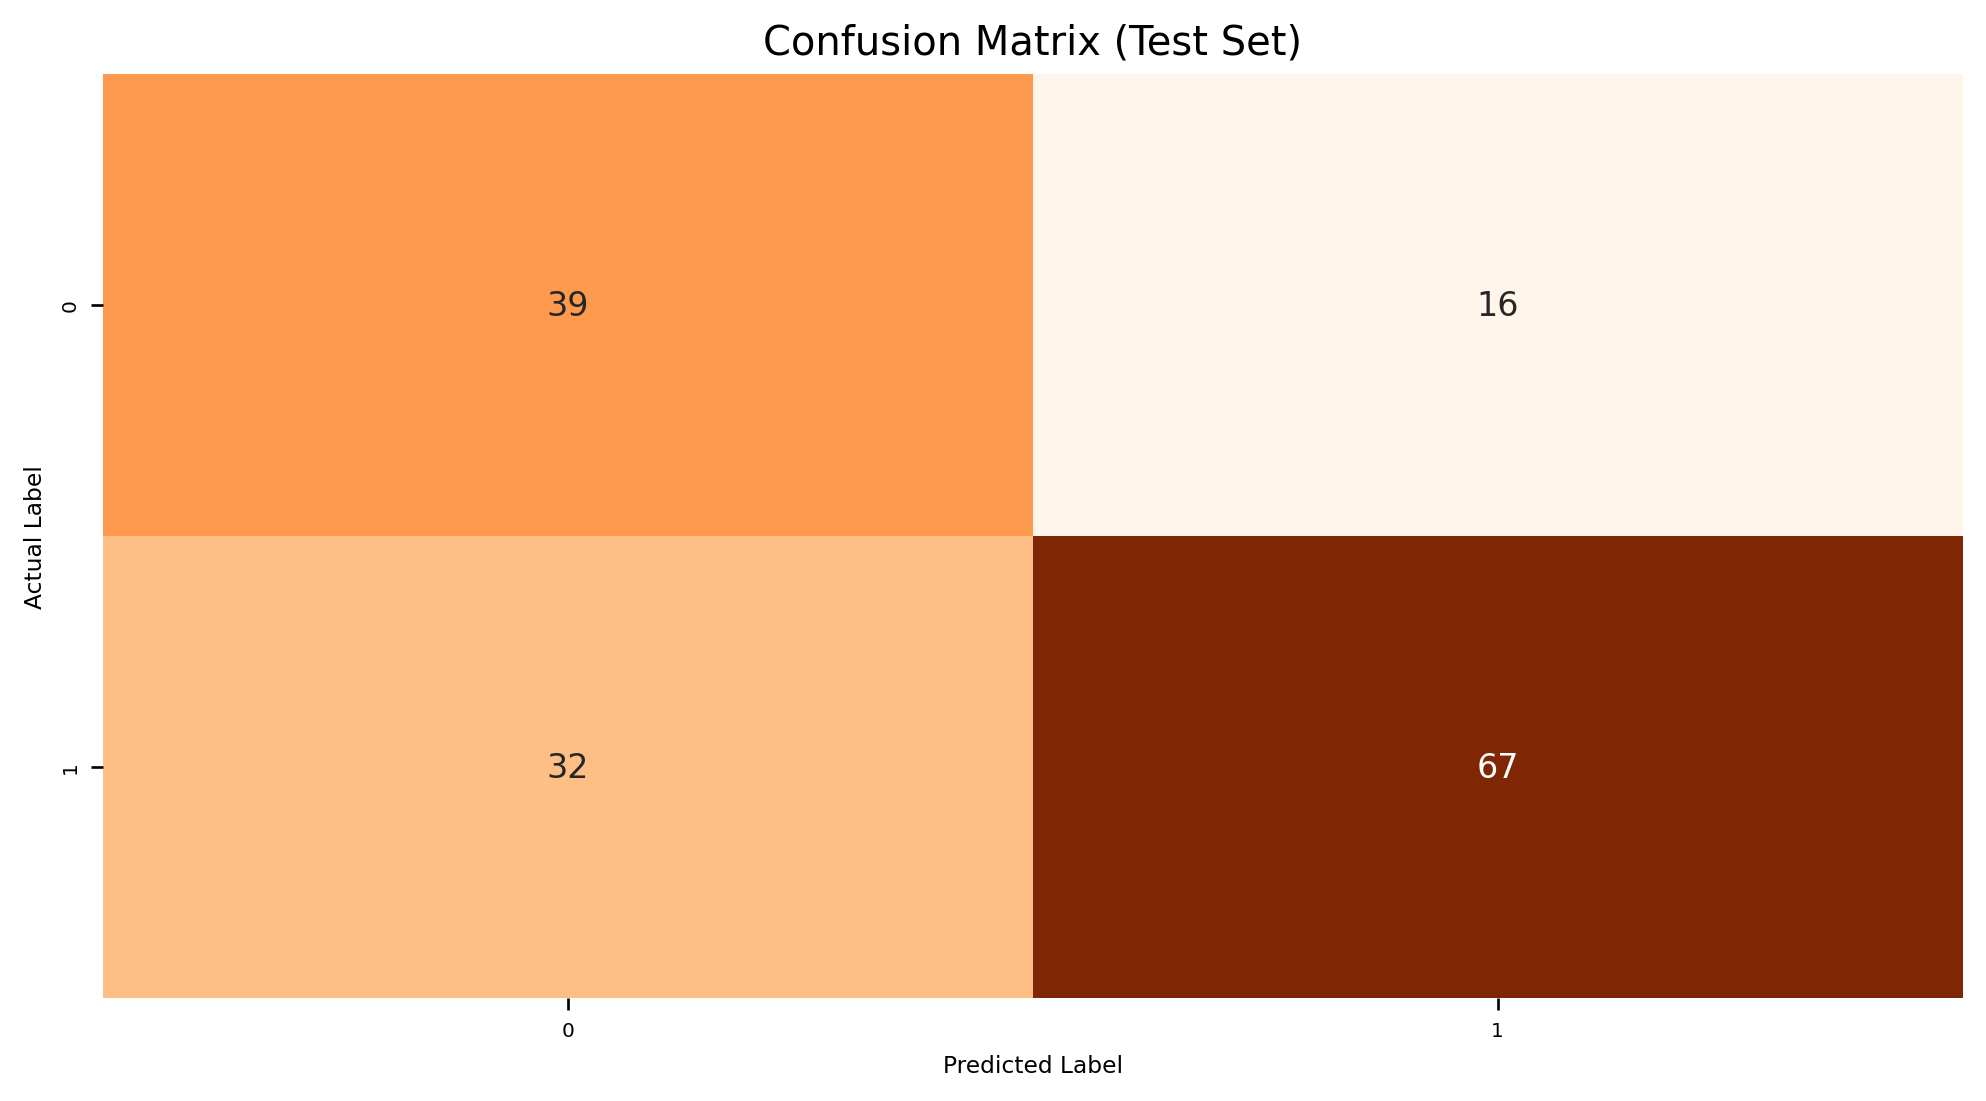

In [108]:
# Model definition: simple linear perceptron
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Hyperparameters
input_size = 8 
learning_rate = 0.001
num_epochs = 1000

model = Perceptron(input_size)

#Loss and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
loss_list = []
accuracy_list = []

for epoch in range(num_epochs):
    model.train() 
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch).squeeze() 
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate accuracy on the training set
    model.eval()  
    with torch.no_grad():
        correct = 0
        total = 0
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch).squeeze()
            predicted = (outputs >= 0.5).float()
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
        accuracy = correct / total
        accuracy_list.append(accuracy)
        loss_list.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

#Evaluation on the test set
model.eval()  
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch).squeeze()
        predicted = (outputs >= 0.5).float()
        all_preds.extend(predicted.tolist())
        all_labels.extend(y_batch.tolist())

# Convert to torch tensors
all_preds = torch.tensor(all_preds)
all_labels = torch.tensor(all_labels)

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
TN, FP, FN, TP = conf_matrix.ravel()

# Sensitivity, Specificity, Accuracy
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f"Sensitivity (Test Set): {sensitivity:.4f}")
print(f"Specificity (Test Set): {specificity:.4f}")
print(f"Accuracy (Test Set): {accuracy:.4f}")

plt.figure(figsize=(10, 5))

plt.plot(loss_list, label='Loss', color='blue')
plt.plot(accuracy_list, label='Accuracy', color='red')

plt.title('Loss and Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# confusion matrix plot 
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


Epoch [10/1000], Loss: 0.6178, Accuracy: 0.7248
Epoch [20/1000], Loss: 0.5488, Accuracy: 0.7313
Epoch [30/1000], Loss: 0.5346, Accuracy: 0.7492
Epoch [40/1000], Loss: 0.5251, Accuracy: 0.7573
Epoch [50/1000], Loss: 0.5307, Accuracy: 0.7573
Epoch [60/1000], Loss: 0.6590, Accuracy: 0.7687
Epoch [70/1000], Loss: 0.6159, Accuracy: 0.7671
Epoch [80/1000], Loss: 0.6659, Accuracy: 0.7622
Epoch [90/1000], Loss: 0.5718, Accuracy: 0.7622
Epoch [100/1000], Loss: 0.5660, Accuracy: 0.7671
Epoch [110/1000], Loss: 0.5434, Accuracy: 0.7720
Epoch [120/1000], Loss: 0.5146, Accuracy: 0.7736
Epoch [130/1000], Loss: 0.4255, Accuracy: 0.7557
Epoch [140/1000], Loss: 0.6179, Accuracy: 0.7638
Epoch [150/1000], Loss: 0.5398, Accuracy: 0.7655
Epoch [160/1000], Loss: 0.5979, Accuracy: 0.7720
Epoch [170/1000], Loss: 0.5894, Accuracy: 0.7704
Epoch [180/1000], Loss: 0.5355, Accuracy: 0.7687
Epoch [190/1000], Loss: 0.4225, Accuracy: 0.7671
Epoch [200/1000], Loss: 0.5005, Accuracy: 0.7704
Epoch [210/1000], Loss: 0.545

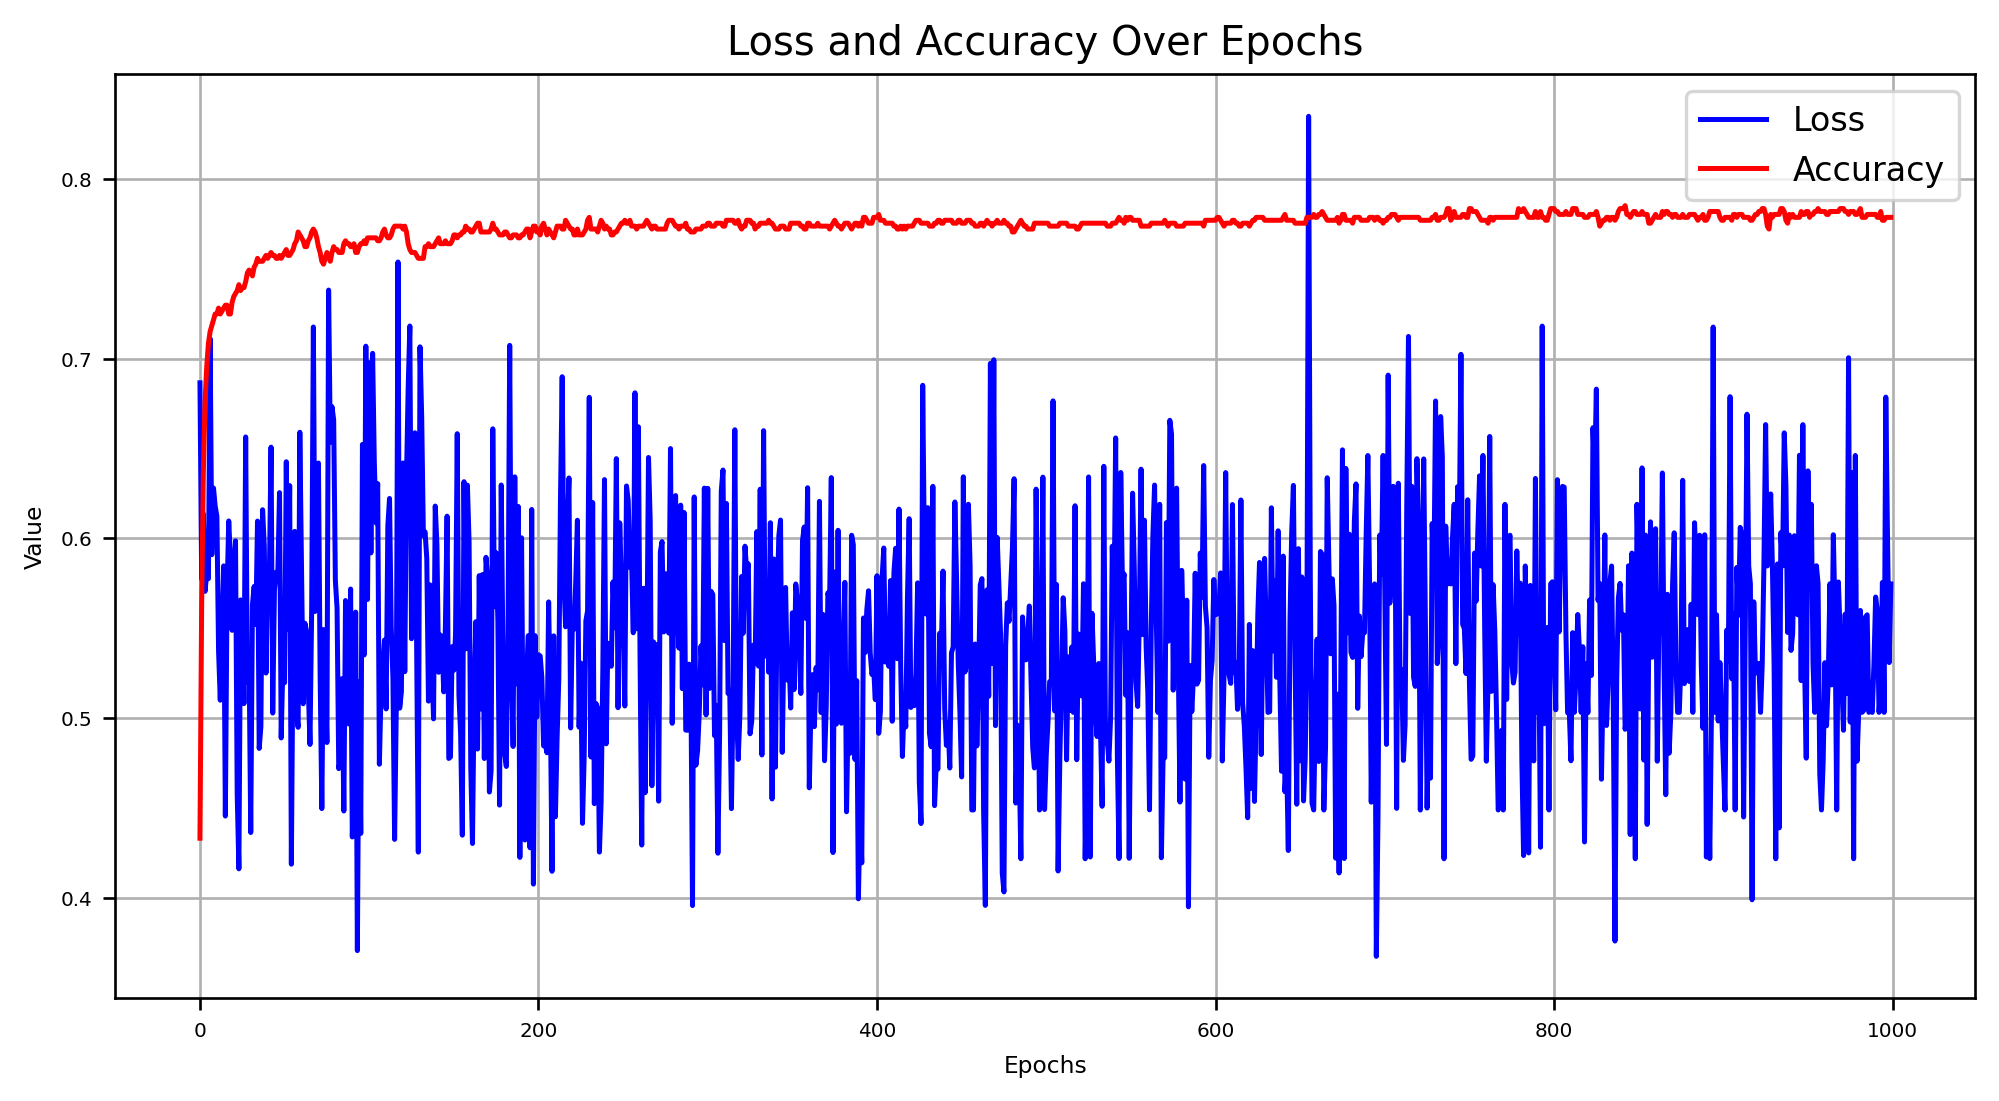

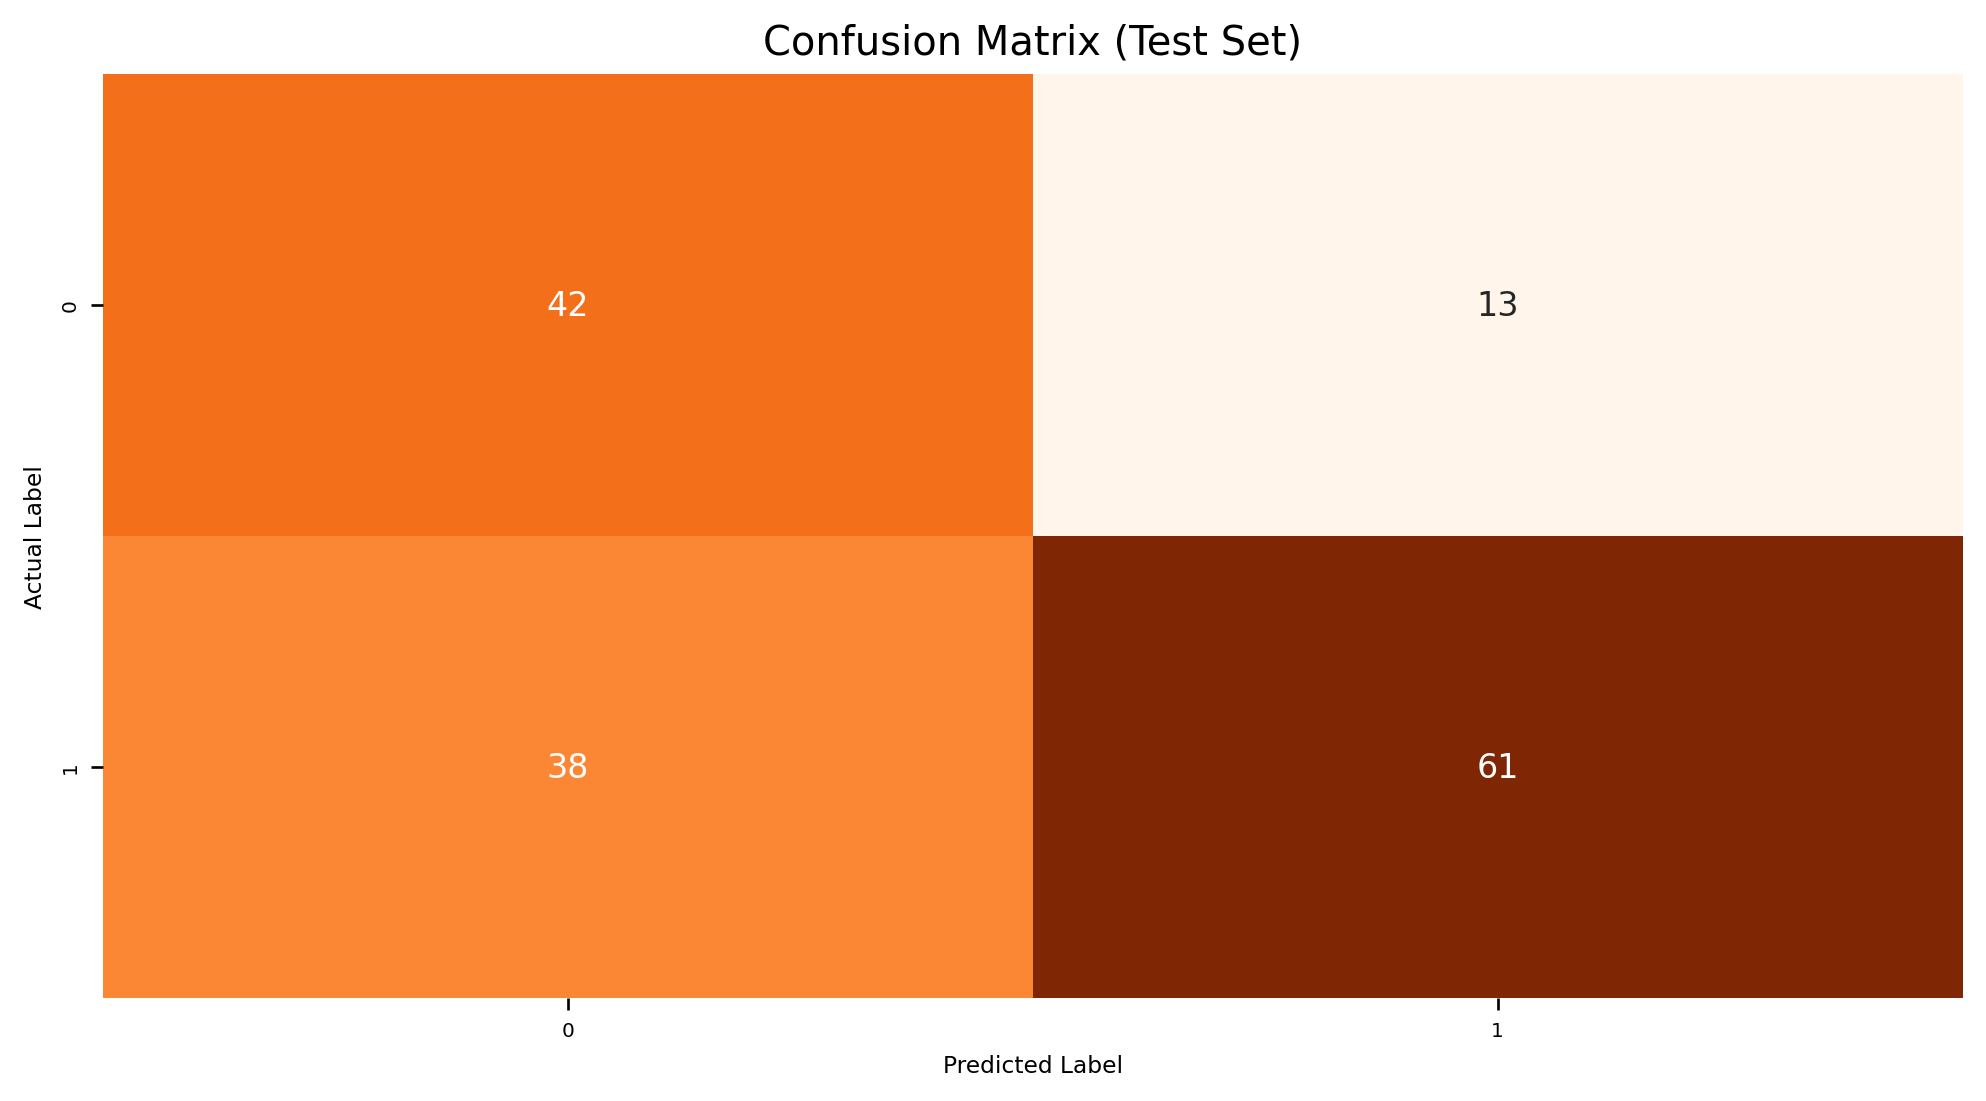

In [106]:
# Model definition: simple linear perceptron
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_size, 16) 
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 1)
        #self.fc4 = nn.Linear(12, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        #x = self.fc3(x)
        return torch.sigmoid(self.fc3(x))

# Hyperparameters
input_size = 8  
learning_rate = 0.001
num_epochs = 1000

model = Perceptron(input_size)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
loss_list = []
accuracy_list = []

for epoch in range(num_epochs):
    model.train()  
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch).squeeze() 
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate accuracy on the training set
    model.eval() 
    with torch.no_grad():
        correct = 0
        total = 0
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch).squeeze()
            predicted = (outputs >= 0.5).float()
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
        accuracy = correct / total
        accuracy_list.append(accuracy)
        loss_list.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

# Evaluation on the test set
model.eval()  
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch).squeeze()
        predicted = (outputs >= 0.5).float()
        all_preds.extend(predicted.tolist())
        all_labels.extend(y_batch.tolist())

# Convert to torch tensors
all_preds = torch.tensor(all_preds)
all_labels = torch.tensor(all_labels)

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
TN, FP, FN, TP = conf_matrix.ravel()

# Sensitivity, Specificity, Accuracy
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f"Sensitivity (Test Set): {sensitivity:.4f}")
print(f"Specificity (Test Set): {specificity:.4f}")
print(f"Accuracy (Test Set): {accuracy:.4f}")

plt.figure(figsize=(10, 5))

plt.plot(loss_list, label='Loss', color='blue')
plt.plot(accuracy_list, label='Accuracy', color='red')

plt.title('Loss and Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# confusion matrix plot
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# Tuning 3

Epoch [10/1000], Loss: 0.7878, Accuracy: 0.5049
Epoch [20/1000], Loss: 0.7813, Accuracy: 0.5537
Epoch [30/1000], Loss: 0.7783, Accuracy: 0.6059
Epoch [40/1000], Loss: 0.7382, Accuracy: 0.6238
Epoch [50/1000], Loss: 0.5892, Accuracy: 0.6466
Epoch [60/1000], Loss: 0.7393, Accuracy: 0.6547
Epoch [70/1000], Loss: 0.4368, Accuracy: 0.6743
Epoch [80/1000], Loss: 0.4833, Accuracy: 0.6971
Epoch [90/1000], Loss: 0.4341, Accuracy: 0.6987
Epoch [100/1000], Loss: 0.5344, Accuracy: 0.7052
Epoch [110/1000], Loss: 0.4538, Accuracy: 0.7199
Epoch [120/1000], Loss: 0.6987, Accuracy: 0.7231
Epoch [130/1000], Loss: 0.4955, Accuracy: 0.7313
Epoch [140/1000], Loss: 0.7712, Accuracy: 0.7345
Epoch [150/1000], Loss: 0.5670, Accuracy: 0.7394
Epoch [160/1000], Loss: 0.4888, Accuracy: 0.7459
Epoch [170/1000], Loss: 0.4362, Accuracy: 0.7492
Epoch [180/1000], Loss: 0.5549, Accuracy: 0.7508
Epoch [190/1000], Loss: 0.3389, Accuracy: 0.7492
Epoch [200/1000], Loss: 0.7098, Accuracy: 0.7492
Epoch [210/1000], Loss: 0.566

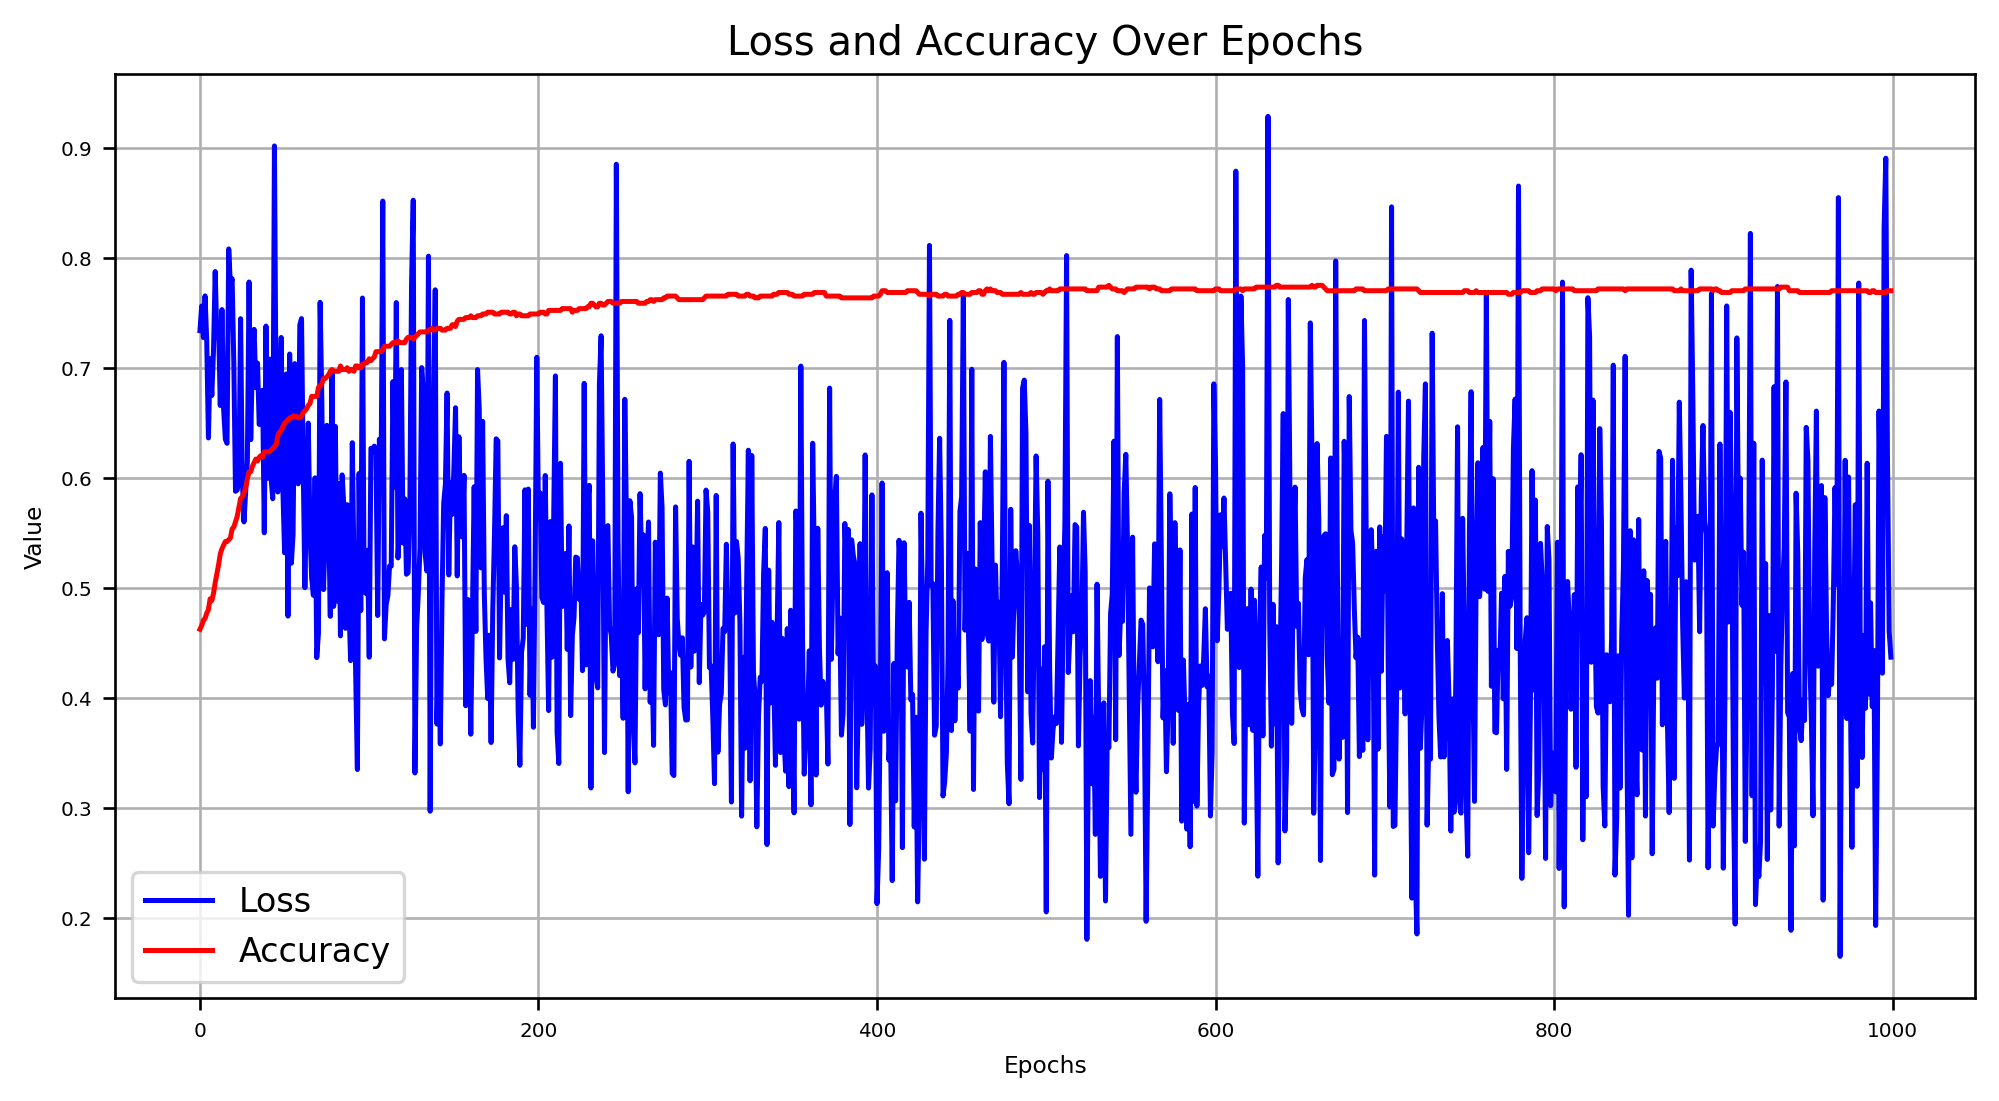

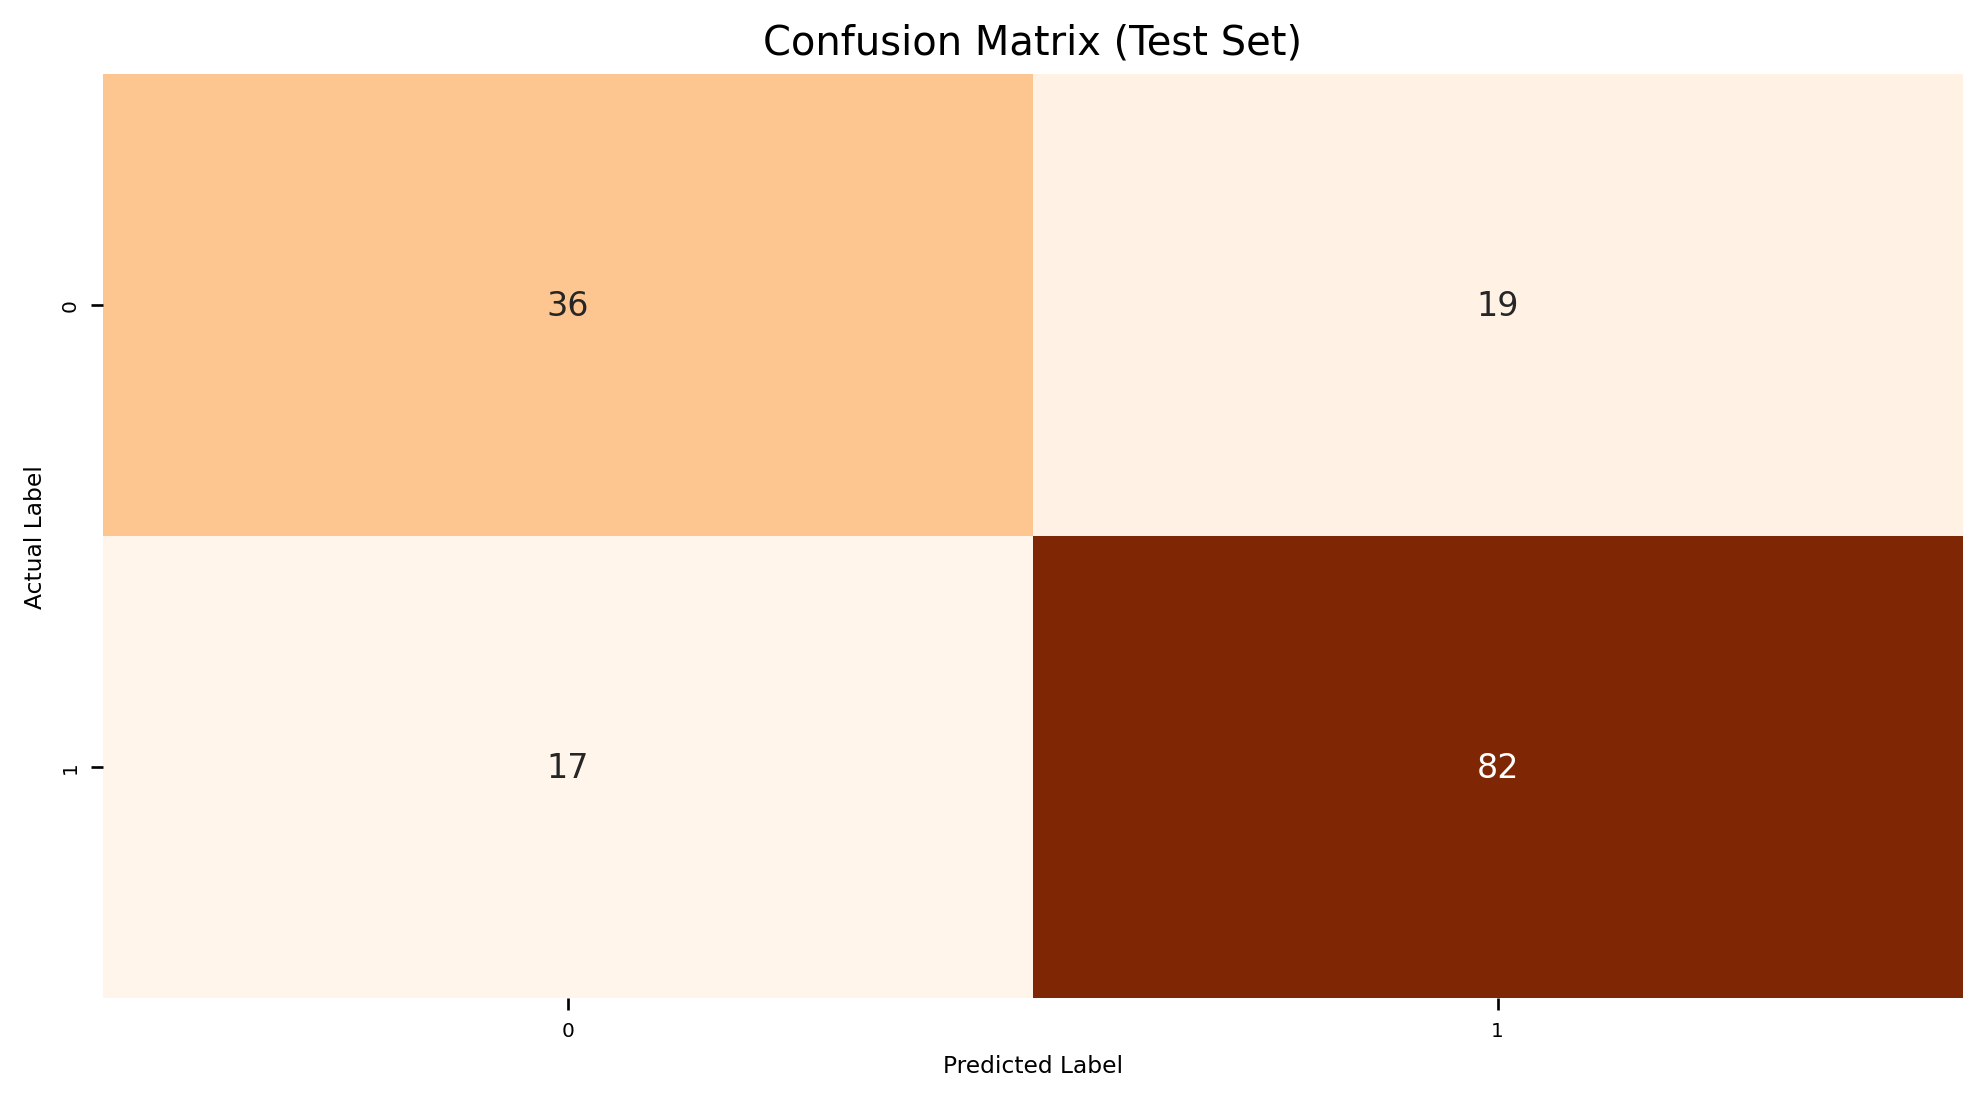

In [109]:
# Model definition: simple linear perceptron
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

#Hyperparameters
input_size = 8  
learning_rate = 0.001
num_epochs = 1000

model = Perceptron(input_size)

#Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
loss_list = []
accuracy_list = []

for epoch in range(num_epochs):
    model.train()  
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch).squeeze() 
        loss = criterion(outputs, y_batch)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate accuracy on the training set
    model.eval()  
    with torch.no_grad():
        correct = 0
        total = 0
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch).squeeze()
            predicted = (outputs >= 0.5).float()
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
        accuracy = correct / total
        accuracy_list.append(accuracy)
        loss_list.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

#Evaluation on the test set
model.eval()  
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch).squeeze()
        predicted = (outputs >= 0.5).float()
        all_preds.extend(predicted.tolist())
        all_labels.extend(y_batch.tolist())

# Convert to torch tensors
all_preds = torch.tensor(all_preds)
all_labels = torch.tensor(all_labels)

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
TN, FP, FN, TP = conf_matrix.ravel()

# Sensitivity, Specificity, Accuracy
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f"Sensitivity (Test Set): {sensitivity:.4f}")
print(f"Specificity (Test Set): {specificity:.4f}")
print(f"Accuracy (Test Set): {accuracy:.4f}")

plt.figure(figsize=(10, 5))

plt.plot(loss_list, label='Loss', color='blue')
plt.plot(accuracy_list, label='Accuracy', color='red')

plt.title('Loss and Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# confusion matrix plot
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


Epoch [10/1000], Loss: 0.4414, Accuracy: 0.7508
Epoch [20/1000], Loss: 0.4157, Accuracy: 0.7687
Epoch [30/1000], Loss: 0.2385, Accuracy: 0.7704
Epoch [40/1000], Loss: 0.3021, Accuracy: 0.7687
Epoch [50/1000], Loss: 0.5128, Accuracy: 0.7769
Epoch [60/1000], Loss: 0.5896, Accuracy: 0.7687
Epoch [70/1000], Loss: 0.6078, Accuracy: 0.7687
Epoch [80/1000], Loss: 0.4151, Accuracy: 0.7704
Epoch [90/1000], Loss: 0.3236, Accuracy: 0.7687
Epoch [100/1000], Loss: 0.4238, Accuracy: 0.7720
Epoch [110/1000], Loss: 0.6374, Accuracy: 0.7687
Epoch [120/1000], Loss: 0.6178, Accuracy: 0.7704
Epoch [130/1000], Loss: 0.4788, Accuracy: 0.7785
Epoch [140/1000], Loss: 0.3311, Accuracy: 0.7785
Epoch [150/1000], Loss: 0.4170, Accuracy: 0.7687
Epoch [160/1000], Loss: 0.6360, Accuracy: 0.7736
Epoch [170/1000], Loss: 0.6921, Accuracy: 0.7720
Epoch [180/1000], Loss: 0.3788, Accuracy: 0.7801
Epoch [190/1000], Loss: 0.3765, Accuracy: 0.7752
Epoch [200/1000], Loss: 0.2831, Accuracy: 0.7704
Epoch [210/1000], Loss: 0.449

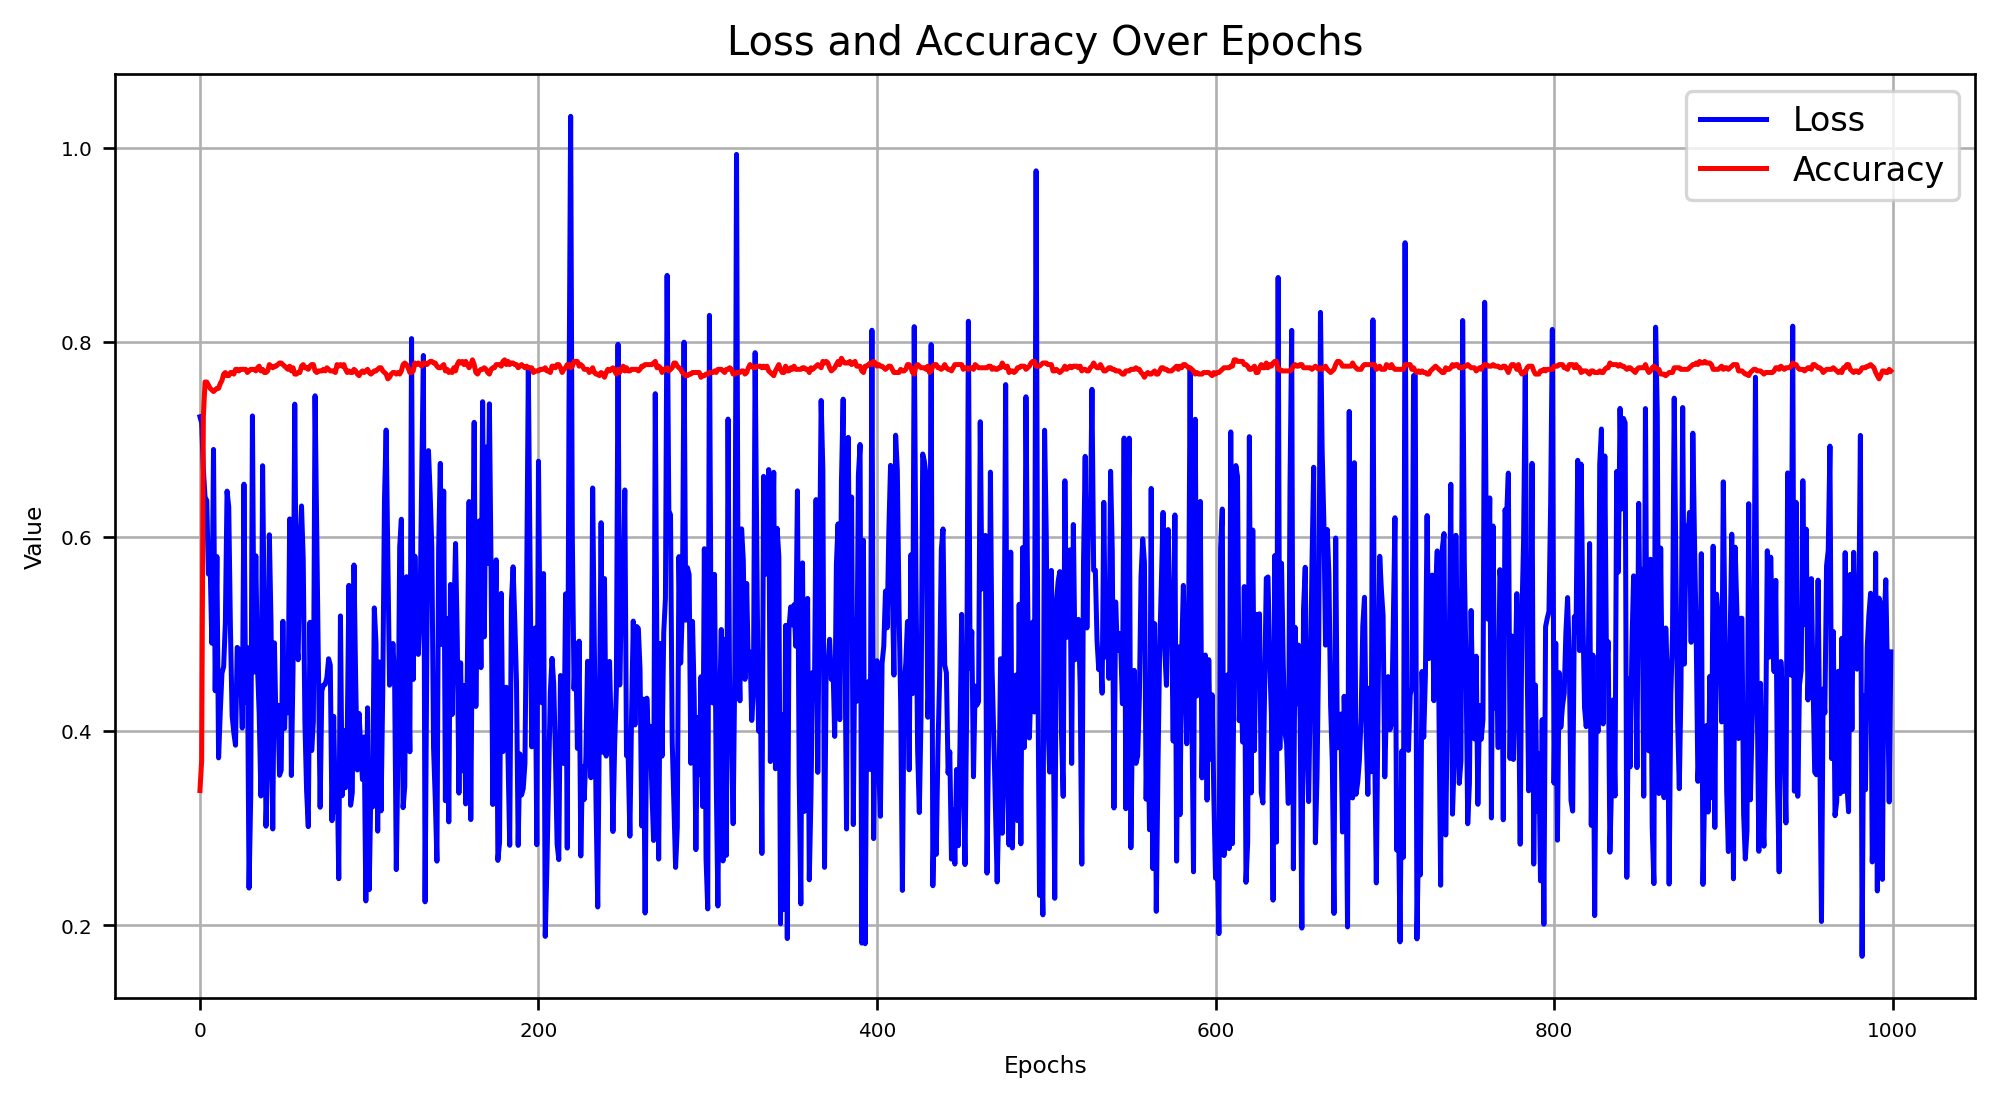

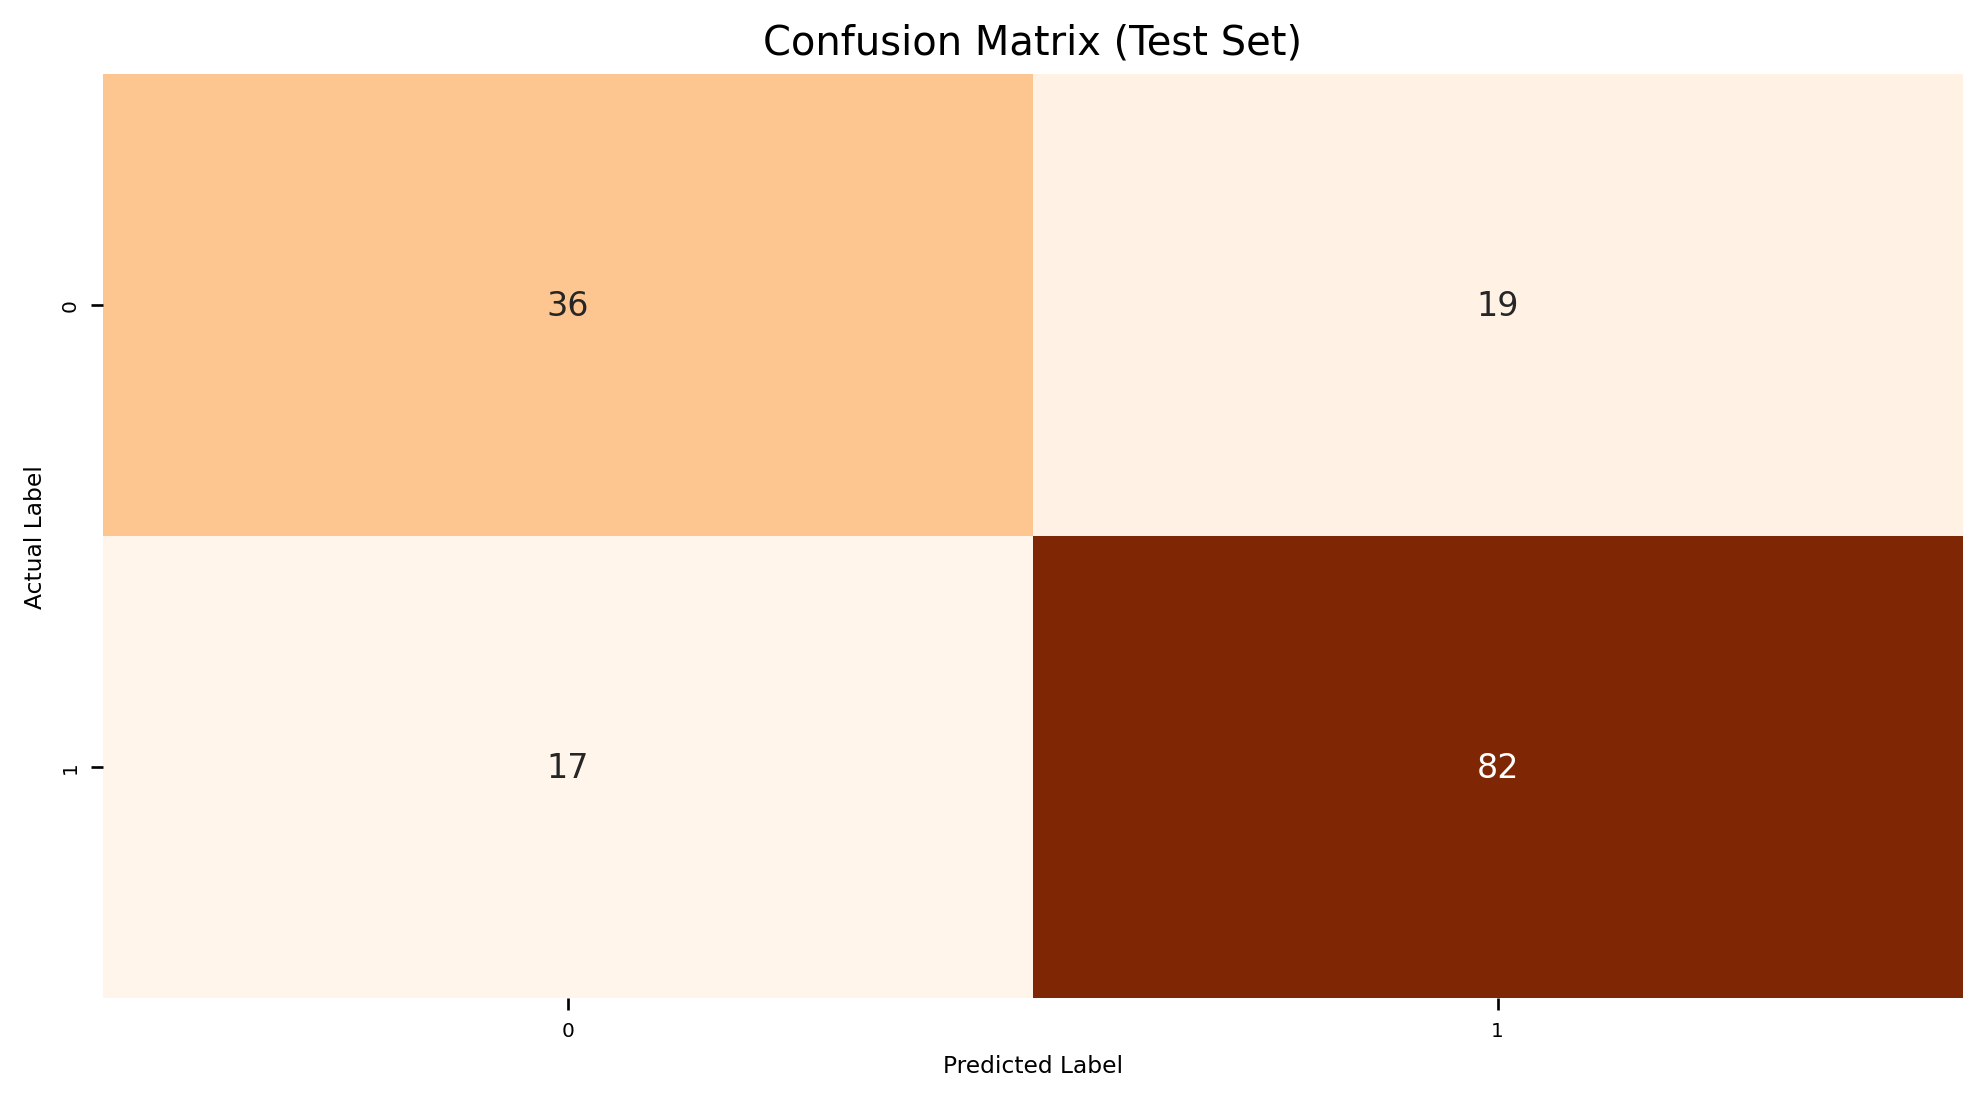

In [112]:
# Model definition: simple linear perceptron
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_size, 16) 
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 8)
        self.fc4 = nn.Linear(8, 1)
        #self.fc4 = nn.Linear(12, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return torch.sigmoid(self.fc4(x))

# Hyperparameters
input_size = 8  # We have 8 features in this case
learning_rate = 0.001
num_epochs = 1000

model = Perceptron(input_size)

# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
loss_list = []
accuracy_list = []

for epoch in range(num_epochs):
    model.train()  
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch).squeeze()  
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate accuracy on the training set
    model.eval() 
    with torch.no_grad():
        correct = 0
        total = 0
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch).squeeze()
            predicted = (outputs >= 0.5).float()
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
        accuracy = correct / total
        accuracy_list.append(accuracy)
        loss_list.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

#Evaluation on the test set
model.eval() 
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch).squeeze()
        predicted = (outputs >= 0.5).float()
        all_preds.extend(predicted.tolist())
        all_labels.extend(y_batch.tolist())

# Convert to torch tensors
all_preds = torch.tensor(all_preds)
all_labels = torch.tensor(all_labels)

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
TN, FP, FN, TP = conf_matrix.ravel()

# Sensitivity, Specificity, Accuracy
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f"Sensitivity (Test Set): {sensitivity:.4f}")
print(f"Specificity (Test Set): {specificity:.4f}")
print(f"Accuracy (Test Set): {accuracy:.4f}")

plt.figure(figsize=(10, 5))

plt.plot(loss_list, label='Loss', color='blue')
plt.plot(accuracy_list, label='Accuracy', color='red')

plt.title('Loss and Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# confusion matrix plot
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
